# Final Project

<b> Project Description </b>

<u> Project Goal:</u>

<b> Analyze the store's product range </b>

- Carry out exploratory data analysis
- Analyze the product range (using RFM analysis and basket analysis)
- Formulate and test statistical hypotheses 

<u>Description of the data:</u>

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

<u> Table of contents: </u>
<br><i>Step 1: Data preprocessing </i>
<br>1.1 Data overview
    <br>1.2 Converting data type
    <br>1.3 Investigating missing values
    <br>1.4 Investigating duplicated data
    <br>1.5 Investigating odd data
<br><i>Step 2: Exploratoty Data Analysis </i>
    <br>2.1 Checking for outliars
    <br>2.2 Adding columns for easier analysis
    <br>2.3 Daily & Monthly activity
    <br>2.4 When seasons change
    <br>2.5 Getting to know our customers
    <br>2.6 Creating price categories
<br><i>Step 3: Product range analysis</i>
    <br>3.1 Classify products into categories by similar word in the description
    <br>3.2 Investigating product categories
<br><i>Step 4: Product RFM analysis</i>
    <br>4.1 Calculate products recency, frequency, monetary values
    <br>4.2 Perform product segmentation according to their RFM using KMeans
    <br>4.3 Clusters visualization
<br><i>Step 5: Invoice analysis</i>
    <br>5.1 Investigating different invoices
    <br>5.2 Apriori Basket Analysis 
    <br>5.3 Investigating the similarity of products
    <br>5.4 Product similarity recommendation system
<br><i>Step 6: Statistical hypothesis test</i>
    <br>6.1 Are expenssive products less popular?
    <br>6.2 Do invoices with high revenue depends on time in the year?
<br><i>Step 7: Project Summary</i>
    <br>7.1 Project summary
    <br>7.2 Conclusions and suggestions
<br><i>List of sources
<br>Link to Presentation & Dashboard - TBD</i>

<b>Step 1: Data Preprocessing:</b>

<u> 1.1 Review the data </u>

In [1]:
#insatlling required libraries
!pip install mlxtend

In [2]:
!pip install sidetable

In [3]:
#import relevant libraries
import pandas as pd
import numpy as np
import sidetable
import datetime as dt
from datetime import date
import calendar
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyoff
import plotly as py
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from collections import Counter
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import sys
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
from scipy.stats import f_oneway

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#read the dataset
try: 
    ecom = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
except:
    print('There was an issue with upload the file "ecommerce_dataset_us.csv"')

In [5]:
#Displaying the data
display(ecom.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

In [6]:
#Looking deeper into the table
ecom.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate      UnitPrice     CustomerID  
count             541909  541909.000000  406829.000000  
unique             23260            NaN            NaN  
top     10/29/2019 14:41            NaN            NaN  
freq                1114            NaN            NaN  
mean                 NaN       4.611114   15287.690570  
std                  NaN      96.759853    1713.600303  
min                  NaN  -11062.060000   12346.000000  
25%                  NaN       1.250000   13953.000000  
50%                  NaN       2.080000   15152.000000  
75%                  NaN       4.130000   16791.000000  
max                  NaN   38970.000000   18287.000000

In [7]:
#checking data types
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [8]:
#checking for missing values
ecom.stb.missing(style = True)

In [9]:
#checking for duplicates
ecom.duplicated().sum()

5268

Our dataset includes the invoice number, product ID, product description, product quantity (for a specific invoice), invoice date, product price and customer ID.

We have 541909 rows in our dataset, which include 25900 unique invoices and 4070 unique product IDs. We can see that we can notice a few odd things in our dataset, which we will investigate soon, like the number of unique product IDs doesn't match the number of unique product decriptions, product prices below 0 and product quantity below 0.

As of product types, customer ID is float and it could be an onject type, Invoice date is an object type and should be datetime type, I will convert these columns later on. 

We have missing data in column Description (which we might be able using the data we have on product ID & description) but only 0.27% which is not alot and in column Customer ID (which we might be able to fill some if we have information on the same invoice ID), here the missing data is for ~25% of the dataset which is a lot.

There are 5268 duplicated rows in the dataset, which is less than 1% of the data, we can probably just drop these rows.

<i> Making the data more readable </i>

In [10]:
#changing column names and product description to lower case
ecom.columns=ecom.columns.str.lower()
ecom['description'] = ecom['description'].str.lower()

In [11]:
#changing column name to better reflect the column content
ecom.columns = ['invoice_no', 'product_no', 'description', 'quantity', 'invoice_date', 'product_price', 'customer_id']

<u> 1.2 Converting data types </u>

In [12]:
#converting data types
#invoice_date column
ecom['invoice_date'] = pd.to_datetime(ecom['invoice_date'],dayfirst=True)
#customer_id column
ecom['customer_id'] = ecom['customer_id'].astype(object)

<u> 1.3 Investigating missing values </u>

In [13]:
#looking into the missing values - product description
display(ecom[ecom['description'].isnull()])

invoice_no product_no description  quantity        invoice_date  \
622        536414      22139         NaN        56 2018-11-29 11:52:00   
1970       536545      21134         NaN         1 2018-11-29 14:32:00   
1971       536546      22145         NaN         1 2018-11-29 14:33:00   
1972       536547      37509         NaN         1 2018-11-29 14:33:00   
1987       536549     85226A         NaN         1 2018-11-29 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581         NaN        -2 2019-05-12 18:26:00   
535326     581203      23406         NaN        15 2019-05-12 18:31:00   
535332     581209      21620         NaN         6 2019-05-12 18:35:00   
536981     581234      72817         NaN        27 2019-06-12 10:33:00   
538554     581408      85175         NaN        20 2019-06-12 14:06:00   

        product_price customer_id  
622               0.0         NaN  
1970              0.0         NaN  
1971              0.0         NaN  
1972              0.0         NaN  
1987              0.0         NaN  
...               ...         ...  
535322            0.0         NaN  
535326            0.0         NaN  
535332            0.0         NaN  
536981            0.0         NaN  
538554            0.0         NaN  

[1454 rows x 7 columns]

It looks like at least some of the rows with missing description also have missing customer ID and price 0. 
I will will check if it's true for all these rows. 
Also I can check if these product (using the product_no) are duplicated in the dataset and we can find their description/price. 

In [14]:
#checking if all missing description rows are also missing customerID rows
d_null = ecom[ecom['description'].isnull()]
pd.notna(d_null['customer_id']).sum()

0

In [15]:
#checking if all missing description rows are also price 0 rows
d_null = ecom[ecom['description'].isnull()]
d_null['product_price'].unique()

array([0.])

All the rows with missing description are also rows with missing customer ID and product price 0, we can assume there was a bug in the system with these purchases. since these rows are only 0.27% of the data we can drop them. 

In [16]:
#dropping the rows with missing product description
ecom.dropna(subset = ['description'], inplace = True)

In [17]:
#checking how many missing customer IDs we still have
ecom.stb.missing(style = True)

In [18]:
#looking into the missing values - customer ID
display(ecom[ecom['customer_id'].isnull()])

invoice_no product_no                      description  quantity  \
1443       536544      21773  decorative rose bathroom bottle         1   
1444       536544      21774  decorative cats bathroom bottle         2   
1445       536544      21786               polkadot rain hat          4   
1446       536544      21787            rain poncho retrospot         2   
1447       536544      21790               vintage snap cards         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          jumbo bag red retrospot         5   
541537     581498     85099C   jumbo  bag baroque black white         4   
541538     581498      85150    ladies & gentlemen metal sign         1   
541539     581498      85174                s/4 cacti candles         1   
541540     581498        DOT                   dotcom postage         1   

              invoice_date  product_price customer_id  
1443   2018-11-29 14:32:00           2.51         NaN  
1444   2018-11-29 14:32:00           2.51         NaN  
1445   2018-11-29 14:32:00           0.85         NaN  
1446   2018-11-29 14:32:00           1.66         NaN  
1447   2018-11-29 14:32:00           1.66         NaN  
...                    ...            ...         ...  
541536 2019-07-12 10:26:00           4.13         NaN  
541537 2019-07-12 10:26:00           4.13         NaN  
541538 2019-07-12 10:26:00           4.96         NaN  
541539 2019-07-12 10:26:00          10.79         NaN  
541540 2019-07-12 10:26:00        1714.17         NaN  

[133626 rows x 7 columns]

In [19]:
#looking at how many invoices have missing customer ID
ecom[ecom['customer_id'].isnull()]['invoice_no'].nunique()

2256

It seems that 2256 purchases out of 25900 purchases we have in the dataset (~9%) are missing the customer id. 
We can try to see if we have the customer id information in on of the rows of these invoice so we can fill up the data, otherwise we can't retrive this information. 

In [20]:
#creating a list of invoice numbers with missing customer id
invoice_list = ecom[ecom['customer_id'].isnull()]['invoice_no'].unique().tolist()

In [21]:
#creating a dataset that includes only the rows of the invoices in the list above
ecom_invoice = ecom.query('invoice_no in @invoice_list')
#check if we can retrive some of the user IDs
ecom_invoice['customer_id'].notna().sum()

0

Unfortunetly, We couldn't retrive the customer ID information from other rows in the dataset. Eventhough these are many rows from our data set we can continue with our research since it is focused on product range and less on customers analysis. 

<u> 1.4 Investigating duplicated data </u> 

In [22]:
#checking for duplicates
(ecom.duplicated().sum() / ecom.shape[0])*100

0.9747342516953308

after removing the missing values rows we have left <1% of the data with duplicated rows, we can drop these duplicated rows. 

In [23]:
#dropping duplicated rows 
ecom = ecom.drop_duplicates()

<u> 1.5 Investigating odd data </u>

We saw that we have a few odd values in our data, we will investigate them. 

In [24]:
#checking why the number of unique product_no was different then the number of unique product description
product_group = ecom.groupby('product_no')['description'].nunique().reset_index()
#checking how many products we have with different description
product_group.query('description > 1').sort_values(by = 'description', ascending = False)

product_no  description
1947         23084            7
168          20713            7
3495         85175            6
841          21830            6
3492         85172            5
...            ...          ...
1652         22777            2
1659         22784            2
1660         22785            2
1665         22792            2
3953  gift_0001_20            2

[650 rows x 2 columns]

We have 650 products that have a number of different product descriptions in the dataset, for easier analysis we should align the description and choose 1 description per product. 
We can choose the most frequent description used for each product_no. 

In [25]:
#aligning the products description with the most frequent one
ecom['description'] = ecom.groupby('product_no')['description'].transform(lambda x: x.mode()[0])

#making sure we don't have any more products with several descriptions
#checking how many products we have with different description
product_group2 = ecom.groupby('product_no')['description'].nunique().reset_index()
product_group2.query('description > 1').sort_values(by = 'description', ascending = False)

Empty DataFrame
Columns: [product_no, description]
Index: []

In [26]:
#looking into product quantity <0 
quantity = ecom.query('quantity < 0')
display(quantity)

invoice_no product_no                       description  quantity  \
141       C536379          D                          discount        -1   
154       C536383     35004C   set of 3 coloured  flying ducks        -1   
235       C536391      22556    plasters in tin circus parade        -12   
236       C536391      21984  pack of 12 pink paisley tissues        -24   
237       C536391      21983  pack of 12 blue paisley tissues        -24   
...           ...        ...                               ...       ...   
540449    C581490      23144   zinc t-light holder stars small       -11   
541541    C581499          M                            manual        -1   
541715    C581568      21258        victorian sewing box large        -5   
541716    C581569      84978  hanging heart jar t-light holder        -1   
541717    C581569      20979     36 pencils tube red retrospot        -5   

              invoice_date  product_price customer_id  
141    2018-11-29 09:41:00          27.50     14527.0  
154    2018-11-29 09:49:00           4.65     15311.0  
235    2018-11-29 10:24:00           1.65     17548.0  
236    2018-11-29 10:24:00           0.29     17548.0  
237    2018-11-29 10:24:00           0.29     17548.0  
...                    ...            ...         ...  
540449 2019-07-12 09:57:00           0.83     14397.0  
541541 2019-07-12 10:28:00         224.69     15498.0  
541715 2019-07-12 11:57:00          10.95     15311.0  
541716 2019-07-12 11:58:00           1.25     17315.0  
541717 2019-07-12 11:58:00           1.25     17315.0  

[9725 rows x 7 columns]

We can see that 9725 rows contain product quantities of less than 0, this might look strange but when looking at the data we see the invoice_no is starting with C, this might suggest these items were canceled, we can check if all the invoice_no on the negative values quantity are for canceled products.

In [27]:
#checking how many rows are considered canceled items
quantity['invoice_no'].drop_duplicates().str.startswith('C').value_counts()

True     3836
False     474
Name: invoice_no, dtype: int64

We have 3836 invoices that begin with the letter C and their product quantity is a negative number, we can assume these are cancellation of products. but we still have additional 474 invoices without the letter C, we should check them as well. 

In [28]:
#display the rows with quantity <0 and invoice_no which doesn't start with C
quantity[quantity['invoice_no'].str.startswith('C') == False]

invoice_no product_no                          description  quantity  \
7313       537032      21275       zinc top  2 door wooden shelf        -30   
13217      537425     84968F   set of 16 vintage sky blue cutlery       -20   
13218      537426     84968E      set of 16 vintage black cutlery       -35   
13264      537432     35833G         4 gold flock christmas balls       -43   
21338      538072      22423             regency cakestand 3 tier       -13   
...           ...        ...                                  ...       ...   
535333     581210      23395       belle jardiniere cushion cover       -26   
535335     581212      22578   wooden star christmas scandinavian     -1050   
535336     581213      22576  swallow wooden christmas decoration       -30   
536908     581226      23090         vintage glass t-light holder      -338   
538919     581422      23169             classic glass cookie jar      -235   

              invoice_date  product_price customer_id  
7313   2018-01-12 16:50:00            0.0         NaN  
13217  2018-04-12 15:35:00            0.0         NaN  
13218  2018-04-12 15:36:00            0.0         NaN  
13264  2018-04-12 16:10:00            0.0         NaN  
21338  2018-07-12 14:10:00            0.0         NaN  
...                    ...            ...         ...  
535333 2019-05-12 18:36:00            0.0         NaN  
535335 2019-05-12 18:38:00            0.0         NaN  
535336 2019-05-12 18:38:00            0.0         NaN  
536908 2019-06-12 09:56:00            0.0         NaN  
538919 2019-06-12 15:24:00            0.0         NaN  

[474 rows x 7 columns]

We can see that the other rows have product price 0 and don't have custome ID, I will check if all these rows are like that.

In [29]:
#checking if all the rows are missing customer ID
quantity[quantity['invoice_no'].str.startswith('C') == False].isnull().value_counts()

invoice_no  product_no  description  quantity  invoice_date  product_price  customer_id
False       False       False        False     False         False          True           474
dtype: int64

In [30]:
quantity[quantity['invoice_no'].str.startswith('C') == False]['product_price'].value_counts()

0.0    474
Name: product_price, dtype: int64

All the rows are missing customer ID and their product price = 0. 
I will remove all the cancelled product rows since I'm not focusing on returns/cancellations, I will save them in a seperate dataset in case we want to investigate them further later. 
I will also remove the other rows with quantity < 0 since it's only 474 rows of our dataset (<0.1%)

In [31]:
#saving a dataset with rows of cancellations
cancelled = quantity[quantity['invoice_no'].str.startswith('C')]

In [32]:
#removing all rows with quantity <0 
ecom_new = ecom.query('quantity > 0')
display(ecom_new)

invoice_no product_no                          description  quantity  \
0          536365     85123A   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406B       cream cupid hearts coat hanger         8   
3          536365     84029G  knitted union flag hot water bottle         6   
4          536365     84029E       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          pack of 20 spaceboy napkins        12   
541905     581587      22899         children's apron dolly girl          6   
541906     581587      23254        childrens cutlery dolly girl          4   
541907     581587      23255      childrens cutlery circus parade         4   
541908     581587      22138        baking set 9 piece retrospot          3   

              invoice_date  product_price customer_id  
0      2018-11-29 08:26:00           2.55     17850.0  
1      2018-11-29 08:26:00           3.39     17850.0  
2      2018-11-29 08:26:00           2.75     17850.0  
3      2018-11-29 08:26:00           3.39     17850.0  
4      2018-11-29 08:26:00           3.39     17850.0  
...                    ...            ...         ...  
541904 2019-07-12 12:50:00           0.85     12680.0  
541905 2019-07-12 12:50:00           2.10     12680.0  
541906 2019-07-12 12:50:00           4.15     12680.0  
541907 2019-07-12 12:50:00           4.15     12680.0  
541908 2019-07-12 12:50:00           4.95     12680.0  

[525462 rows x 7 columns]

In [33]:
display(ecom_new.describe())

quantity  product_price
count  525462.000000  525462.000000
mean       10.681024       3.876109
std       157.399272      42.040021
min         1.000000  -11062.060000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000

In [34]:
#looking into rows with price < 0 
price = ecom_new.query('product_price <0')
display(price)

invoice_no product_no      description  quantity        invoice_date  \
299983    A563186          B  adjust bad debt         1 2019-10-08 14:51:00   
299984    A563187          B  adjust bad debt         1 2019-10-08 14:52:00   

        product_price customer_id  
299983      -11062.06         NaN  
299984      -11062.06         NaN

After removing the quantity < 0 rows we are now left with only 2 rows with price < 0 , we can remove these two rows also because we can see it's not a real product it's a row for 'adjust bad debt'.

In [35]:
#removing rows with price < 0
ecom_new2 = ecom_new.query('product_price >= 0')

In [36]:
#now we will investigate rows with price = 0
price_z = ecom_new2.query('product_price == 0')
display(price_z)

invoice_no product_no                         description  quantity  \
6391       536941      22734  set of 6 ribbons vintage christmas        20   
6392       536942      22139    retrospot tea set ceramic 11 pc         15   
9302       537197      22841        round cake tin vintage green         1   
14335      537534      85064        cream sweetheart letter rack         1   
14336      537534      84832    zinc willie winkie  candle stick         1   
...           ...        ...                                 ...       ...   
524622     580609      22927      green giant garden thermometer         1   
535325     581202      23404          home sweet home blackboard        41   
535334     581211      22142        christmas craft white fairy         14   
538504     581406     46000M        polyester filler pad 45x45cm       240   
538505     581406     46000S        polyester filler pad 40x40cm       300   

              invoice_date  product_price customer_id  
6391   2018-01-12 12:08:00            0.0         NaN  
6392   2018-01-12 12:08:00            0.0         NaN  
9302   2018-03-12 14:02:00            0.0     12647.0  
14335  2018-05-12 11:48:00            0.0         NaN  
14336  2018-05-12 11:48:00            0.0         NaN  
...                    ...            ...         ...  
524622 2019-03-12 11:41:00            0.0         NaN  
535325 2019-05-12 18:30:00            0.0         NaN  
535334 2019-05-12 18:36:00            0.0         NaN  
538504 2019-06-12 13:58:00            0.0         NaN  
538505 2019-06-12 13:58:00            0.0         NaN  

[582 rows x 7 columns]

In [37]:
#how many items are missing product price?
price_z['product_no'].nunique()

318

We have 582 rows with product price = 0 (318 products), we can notice rows with no customer ID as well. I will check if we have the prices of these items in our dataset.

In [38]:
#create a list of product_no with price = 0
price_list = price_z[price_z['product_price'] == 0]['product_no'].tolist()

In [39]:
#check if we have these product_no in the dataset with a price tag other than 0
temp = ecom_new2.query('product_no in @price_list & product_price != 0')
display(temp.describe())

quantity  product_price
count  91827.000000   91827.000000
mean       9.951006       7.015004
std       36.225680      57.219167
min        1.000000       0.001000
25%        1.000000       1.650000
50%        3.000000       2.950000
75%       10.000000       4.950000
max     2400.000000    4505.170000

In [40]:
#checking if the same product can have a different price
temp_pivot= temp.pivot_table(columns = 'product_no', values = 'product_price', aggfunc= 'nunique')
temp_pivot

product_no     10080  16162M  16168M  16207A  17012F  17091A  17109D  17136A  \
product_price      2       1       3       3       5       2       2       2   

product_no     18098C  20615  ...  85123A  85127  85135B  85135C  85185B  \
product_price       3      6  ...       7      5       2       3       4   

product_no     85231G  DOT    M  PADS  gift_0001_20  
product_price       4  686  131     1             2  

[1 rows x 315 columns]

We have the prices of 315 product out of the 318, but we can see that each product has several different prices, it may vary with time in the year, or depends on specific promos we run, hence, we can't fill the price = 0 with a specific value since this might be incorrect for the time of purchase, also, maybe the price is 0 because it was a gift in the pruchase (like buy 1 get 1 free promo).  
Since it's only 582 rows of our data I decided to remove them. 

In [41]:
#removing rows with price <= 0
ecom_new2 = ecom_new.query('product_price > 0')

<b> Step 2: Exploratory Data Analysis <b>

<u> 2.1 Checking for outliars </u>

In [42]:
#looking for the description of the quantitive values - quantity and product_price
ecom_new2.describe()

quantity  product_price
count  524878.000000  524878.000000
mean       10.616600       3.922573
std       156.280031      36.093028
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000

We can see that both columns contain extreme outliars, I will use box plot to visulaize the values. 

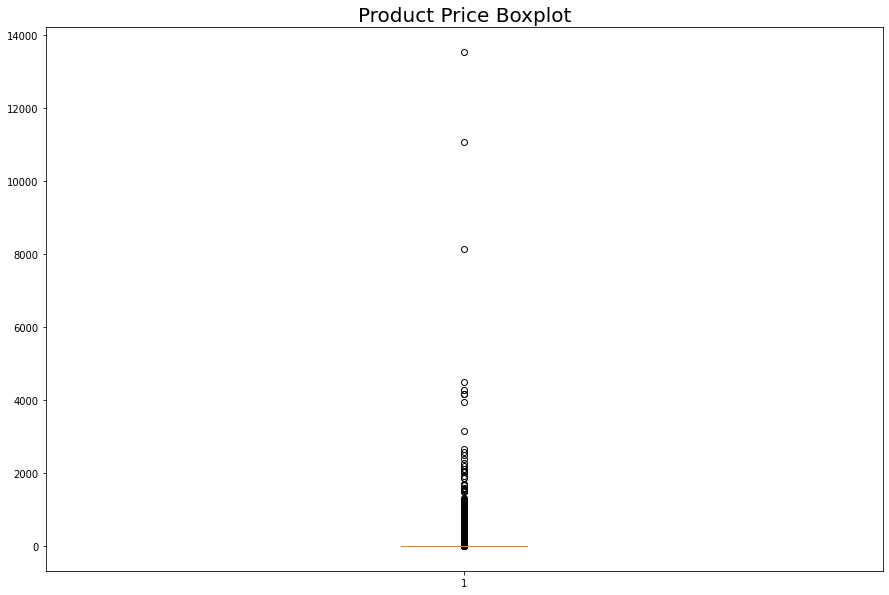

In [43]:
#boxplot for product price
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_new2['product_price'])
plt.title('Product Price Boxplot', size = 20)
plt.show()

In [44]:
ecom_new2.query('product_price > 3000')

invoice_no product_no      description  quantity        invoice_date  \
15017      537632  AMAZONFEE       amazon fee         1 2018-05-12 15:08:00   
173382     551697       POST          postage         1 2019-01-05 13:46:00   
268028     560373          M           manual         1 2019-07-16 12:30:00   
297723     562955        DOT   dotcom postage         1 2019-09-08 10:14:00   
299982    A563185          B  adjust bad debt         1 2019-10-08 14:50:00   
374542     569382          M           manual         1 2019-01-10 16:44:00   
406406     571751          M           manual         1 2019-10-17 11:18:00   
422351     573077          M           manual         1 2019-10-25 14:13:00   
422376     573080          M           manual         1 2019-10-25 14:20:00   

        product_price customer_id  
15017        13541.33         NaN  
173382        8142.75     16029.0  
268028        4287.63         NaN  
297723        4505.17         NaN  
299982       11062.06         NaN  
374542        3155.95     15502.0  
406406        3949.32     12744.0  
422351        4161.06     12536.0  
422376        4161.06     12536.0

All of the above are prices for services and not for products, it will not change our product range analysis if we drop these types of product descriptions. 

In [45]:
#create a list of descriptions to remove
description_drop = ['amazon fee', 'postage', 'manual', 'dotcom postage', 'adjust bad debt']
#remove the rows which includes the above descriptions
ecom_new2 = ecom_new2.query('description not in @description_drop')

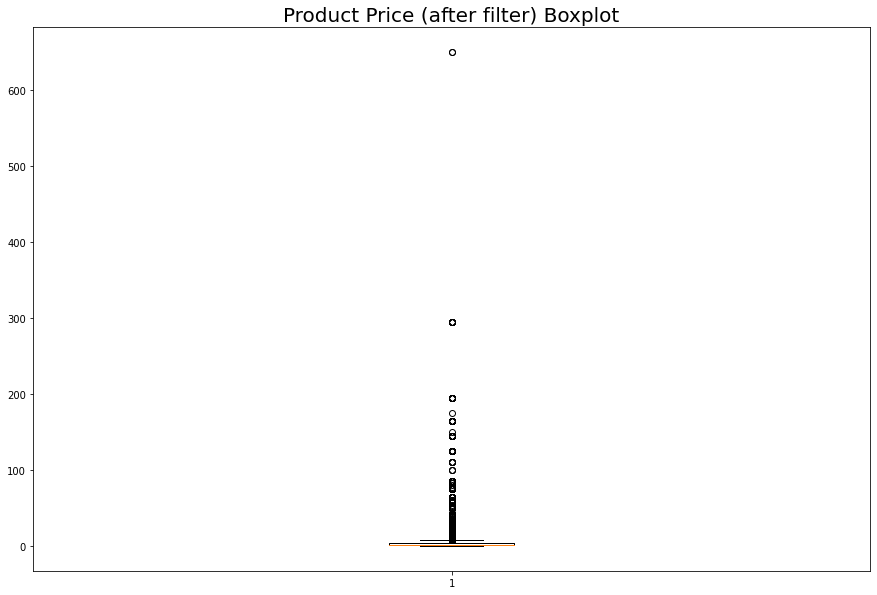

In [46]:
#looking at the outliars after filter
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_new2['product_price'])
plt.title('Product Price (after filter) Boxplot', size = 20)
plt.show()

In [47]:
#checking the rows with price > 200
ecom_new2.query('product_price > 200')

invoice_no product_no                   description  quantity  \
4989       536835      22655   vintage red kitchen cabinet         1   
32484      539080      22655   vintage red kitchen cabinet         1   
51636      540647      22655   vintage red kitchen cabinet         1   
82768      543253      22655   vintage red kitchen cabinet         1   
118769     546480      22656  vintage blue kitchen cabinet         1   
133994     547814      22656  vintage blue kitchen cabinet         1   
171178     551393      22656  vintage blue kitchen cabinet         1   
205759     554836      22655   vintage red kitchen cabinet         1   
222680     556444      22502    picnic basket wicker small        60   
222682     556446      22502    picnic basket wicker small         1   

              invoice_date  product_price customer_id  
4989   2018-11-30 18:06:00          295.0     13145.0  
32484  2018-12-14 08:41:00          295.0     16607.0  
51636  2019-08-01 14:57:00          295.0     17406.0  
82768  2019-02-02 15:32:00          295.0     14842.0  
118769 2019-12-03 11:38:00          295.0     13452.0  
133994 2019-03-23 14:19:00          295.0     13452.0  
171178 2019-04-26 12:22:00          295.0     14973.0  
205759 2019-05-24 16:25:00          295.0     13015.0  
222680 2019-08-06 15:28:00          649.5     15098.0  
222682 2019-08-06 15:33:00          649.5     15098.0

There are 3 types of items with prices over 200 $, yet, after a quick online search I saw these prices are reasonable for these items. 

In [48]:
#calculating the 95h percentile of the price data
low = .05
high = .95
price_df = ecom_new2['product_price'].quantile([low, high])
display(price_df)

0.05    0.42
0.95    9.95
Name: product_price, dtype: float64

In [49]:
#count the number of purchases with prices above the 95 percentile
ecom_new2[ecom_new2['product_price'] > 9.95].shape[0]

22579

There are 22579 purchases of products with price greater than 9.95 (the 95th percentile), I believe this is a significant amount so I will not drop them yet and move to investigating the quantity outliars.

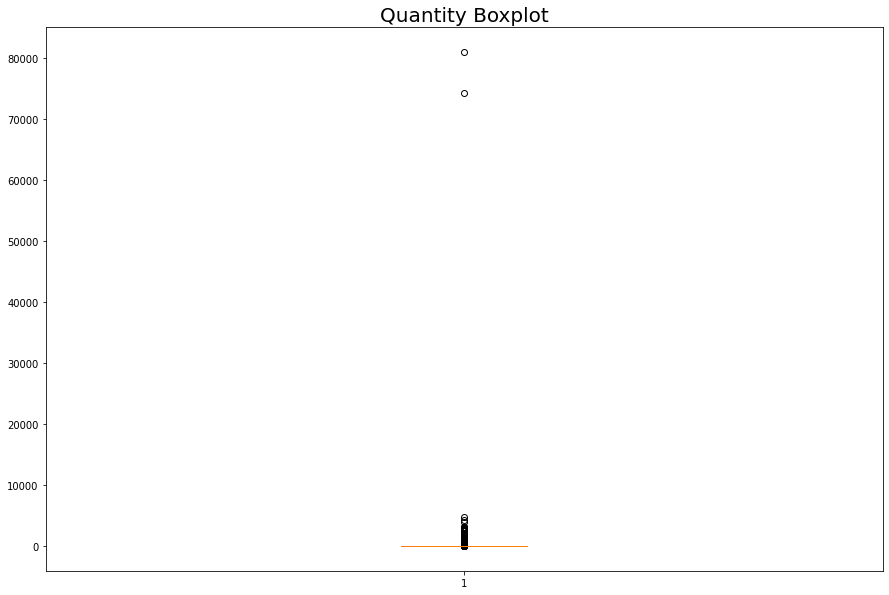

In [50]:
#looking for quantity coloumn outliars
#boxplot
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_new2['quantity'])
plt.title('Quantity Boxplot', size = 20)
plt.show()

In [51]:
#looking at rows with quantity > 10000
ecom_new2.query('quantity > 10000')

invoice_no product_no                     description  quantity  \
61619      541431      23166  medium ceramic top storage jar     74215   
540421     581483      23843     paper craft , little birdie     80995   

              invoice_date  product_price customer_id  
61619  2019-01-16 10:01:00           1.04     12346.0  
540421 2019-07-12 09:15:00           2.08     16446.0

We have 2 rows we extreme outliars of purchase quantity of 70,000 and 80,000 which seems not reasonable, we will remove these rows.
We can look to see if maybe these purchases were cancelled due to a mistake in our cancelled dataset. 

In [52]:
#checking if the purchases we found above with the really high quantity were cancelled
cancelled.query('quantity == -74215')

invoice_no product_no                     description  quantity  \
61624    C541433      23166  medium ceramic top storage jar    -74215   

             invoice_date  product_price customer_id  
61624 2019-01-16 10:17:00           1.04     12346.0

In [53]:
#checking if the purchases we found above with the really high quantity were cancelled
cancelled.query('quantity == -80995')

invoice_no product_no                  description  quantity  \
540422    C581484      23843  paper craft , little birdie    -80995   

              invoice_date  product_price customer_id  
540422 2019-07-12 09:27:00           2.08     16446.0

These two rows were cancelled as we assumed, we can remove them from the dataset.

In [54]:
#removing rows with quantity > 10000
ecom_new2 = ecom_new2.query('quantity <10000')

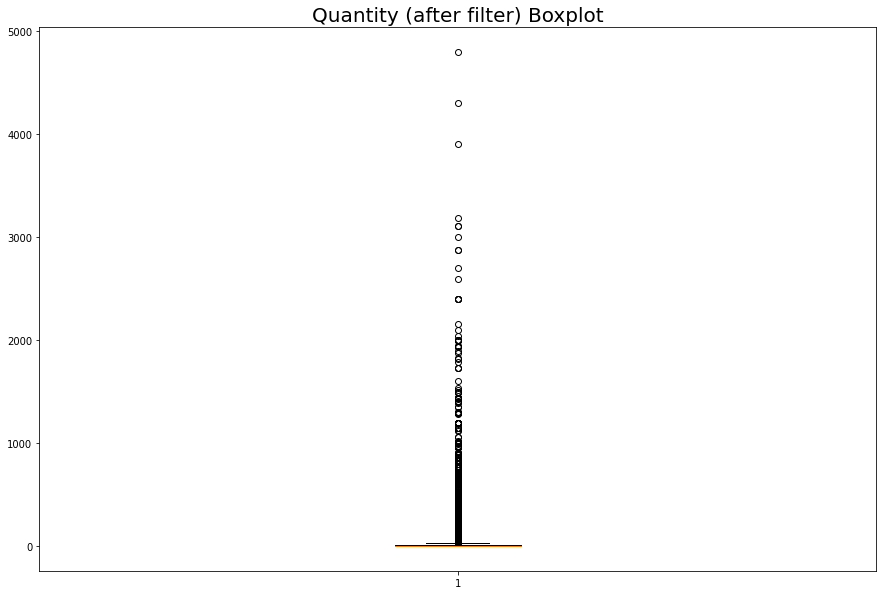

In [55]:
#looking for quantity coloumn outliars
#boxplot
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_new2['quantity'])
plt.title('Quantity (after filter) Boxplot', size = 20)
plt.show()

In [56]:
#looking for the outliars with quantity > 3000
ecom_new2.query('quantity > 3000')

invoice_no product_no                          description  quantity  \
52711      540815      21108   fairy cake flannel assorted colour      3114   
97432      544612      22053                empire design rosette      3906   
160546     550461      21108   fairy cake flannel assorted colour      3114   
206121     554868      22197                       popcorn holder      4300   
270885     560599      18007  essential balm 3.5g tin in envelope      3186   
421632     573008      84077    world war 2 gliders asstd designs      4800   

              invoice_date  product_price customer_id  
52711  2019-09-01 12:55:00           2.10     15749.0  
97432  2019-02-20 10:43:00           0.82     18087.0  
160546 2019-04-16 13:20:00           2.10     15749.0  
206121 2019-05-25 10:52:00           0.72     13135.0  
270885 2019-07-17 17:04:00           0.06     14609.0  
421632 2019-10-25 12:26:00           0.21     12901.0

The items with quantity over 3000 are real products (with very low price), I will keep these rows for now, maybe our store sells also for suppliers who buy in large quantities.  
since the product price and the quantity depends on one another I will investigate the outliars of their combination, the revenue. 

In [57]:
#calculating revenue in a new coloumn
ecom_new2['revenue'] = ecom_new2['product_price']*ecom_new2['quantity']

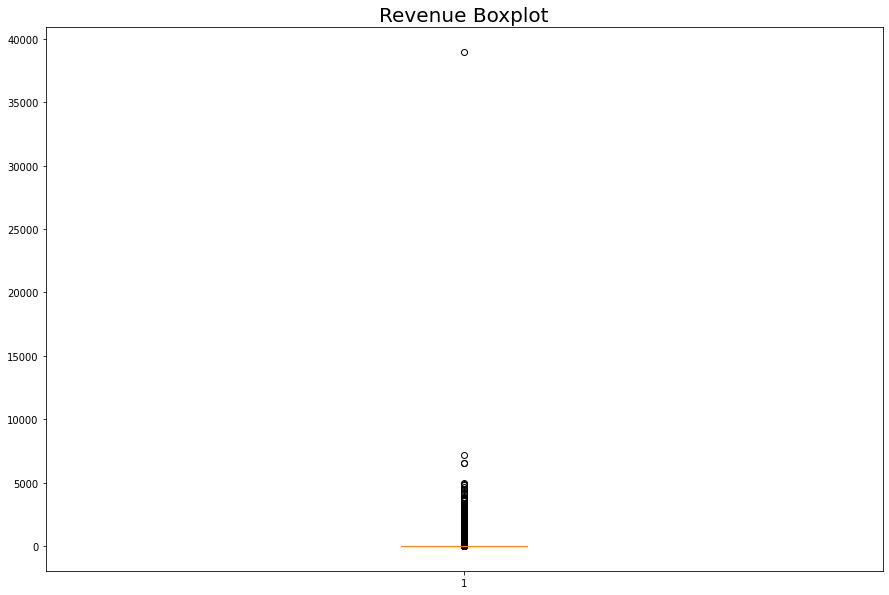

In [58]:
#looking for revenue coloumn outliars
#boxplot
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_new2['revenue'])
plt.title('Revenue Boxplot', size = 20)
plt.show()

In [59]:
#looking at the extreme high revenue rows
ecom_new2.query('revenue >5000')

invoice_no product_no                          description  quantity  \
52711      540815      21108   fairy cake flannel assorted colour      3114   
160546     550461      21108   fairy cake flannel assorted colour      3114   
222680     556444      22502           picnic basket wicker small        60   
348325     567423      23243  set of tea coffee sugar tins pantry      1412   

              invoice_date  product_price customer_id   revenue  
52711  2019-09-01 12:55:00           2.10     15749.0   6539.40  
160546 2019-04-16 13:20:00           2.10     15749.0   6539.40  
222680 2019-08-06 15:28:00         649.50     15098.0  38970.00  
348325 2019-09-18 11:05:00           5.06     17450.0   7144.72

We only have 4 rows with extremely high revenue, we will look into these rows and check if these purchases were cancelled as well.

In [60]:
#checking if the purchases we found above with the really high quantity were cancelled
cancelled.query('quantity == -3114')

invoice_no product_no                         description  quantity  \
160145    C550456      21108  fairy cake flannel assorted colour     -3114   

              invoice_date  product_price customer_id  
160145 2019-04-16 13:08:00            2.1     15749.0

In [61]:
#checking if the purchases we found above with the really high quantity were cancelled
cancelled.query('quantity == -60')

invoice_no product_no                     description  quantity  \
29066     C538702      84826  asstd design 3d paper stickers       -60   
71522     C542138      16237            sleeping cat erasers       -60   
159851    C550365      22398      magnets pack of 4 swallows       -60   
222692    C556448      22502      picnic basket wicker small       -60   
404835    C571695      21703         bag 125g swirly marbles       -60   

              invoice_date  product_price customer_id  
29066  2018-12-12 10:28:00           0.85     13008.0  
71522  2019-01-23 17:21:00           0.21     17368.0  
159851 2019-04-16 11:31:00           1.25     12731.0  
222692 2019-08-06 15:39:00           4.95     15098.0  
404835 2019-10-16 14:46:00           0.42     14776.0

In [62]:
#checking if the purchases we found above with the really high quantity were cancelled
cancelled.query('quantity == -1412')

Empty DataFrame
Columns: [invoice_no, product_no, description, quantity, invoice_date, product_price, customer_id]
Index: []

We can see that 2 out of the 4 extreme rows  were actually cancelled (index 160546 & 222680) , we can remove them from our data. 

In [63]:
#filter rows with quantity > 5000
ecom_filtered = ecom_new2.query('revenue < 5000')

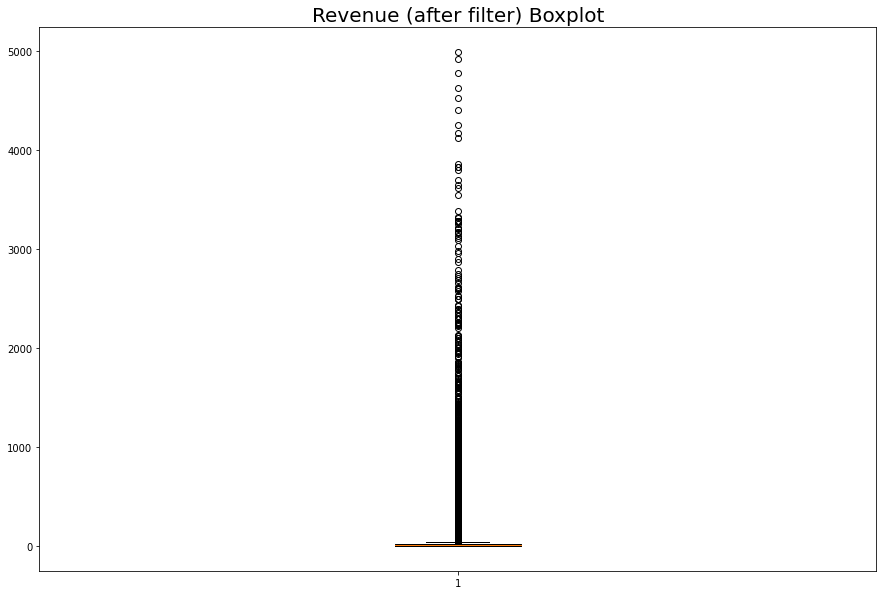

In [64]:
#new boxplot for filtered data
fig = plt.figure(figsize =(15, 10))
plt.boxplot(ecom_filtered['revenue'])
plt.title('Revenue (after filter) Boxplot', size = 20)
plt.show()

<u> 2.2 Adding columns for easier analysis </u>

<i> Dates </i>

In [65]:
#adding additional columns for date, day of the week & month 
ecom_filtered['date']=ecom_filtered['invoice_date'].dt.normalize()
ecom_filtered['month']=ecom_filtered['date'].astype('datetime64[M]')
ecom_filtered['day']=ecom_filtered['date'].dt.day_name()
display(ecom_filtered.head())

invoice_no product_no                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  product_price customer_id  revenue       date  \
0 2018-11-29 08:26:00           2.55     17850.0    15.30 2018-11-29   
1 2018-11-29 08:26:00           3.39     17850.0    20.34 2018-11-29   
2 2018-11-29 08:26:00           2.75     17850.0    22.00 2018-11-29   
3 2018-11-29 08:26:00           3.39     17850.0    20.34 2018-11-29   
4 2018-11-29 08:26:00           3.39     17850.0    20.34 2018-11-29   

       month       day  
0 2018-11-01  Thursday  
1 2018-11-01  Thursday  
2 2018-11-01  Thursday  
3 2018-11-01  Thursday  
4 2018-11-01  Thursday

In [66]:
#Looking at the distribution of sales in day of the week
ecom_filtered['day'].value_counts()

Thursday     92510
Wednesday    91203
Friday       88561
Tuesday      83935
Saturday     70791
Monday       65855
Sunday       29865
Name: day, dtype: int64

<u> 2.3 Daily & Monthly activity </u> 

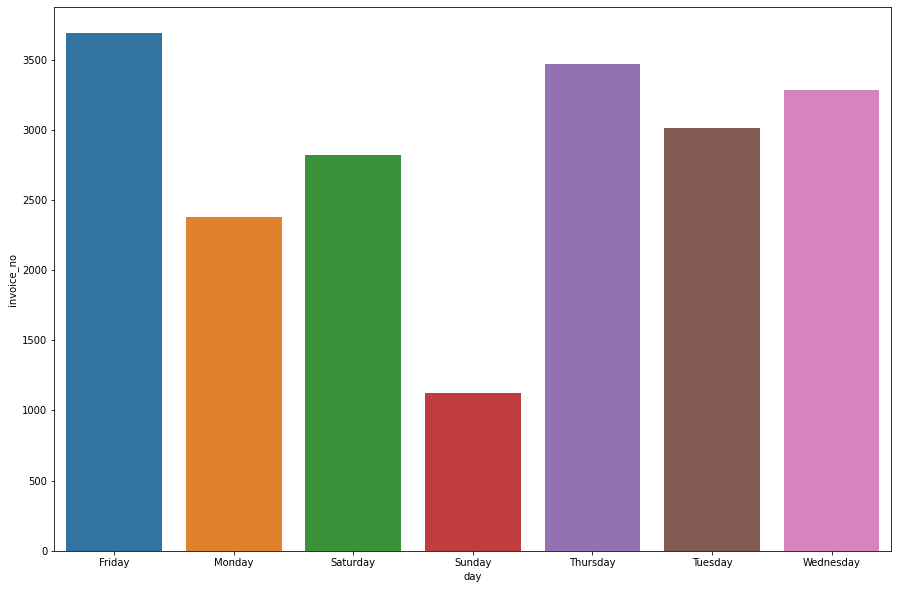

In [67]:
#which day is the most active (highest number of purchases)
plt.figure(figsize = (15, 10))
sns.barplot(x = 'day', y= 'invoice_no', data = ecom_filtered.groupby('day')['invoice_no'].nunique().reset_index())
plt.show()

We can see that Friday is the most active day of the week in term of number of purchases per day, while Sunday is the least active (many people spend time with their family\travel on Sunday so they spend less time online shopping).

In [68]:
#what is the period of time our data was collected
print('The data was collected from {} to {}'.format(ecom_filtered['invoice_date'].min(), ecom_filtered['invoice_date'].max()))

The data was collected from 2018-01-12 09:31:00 to 2019-12-11 17:55:00


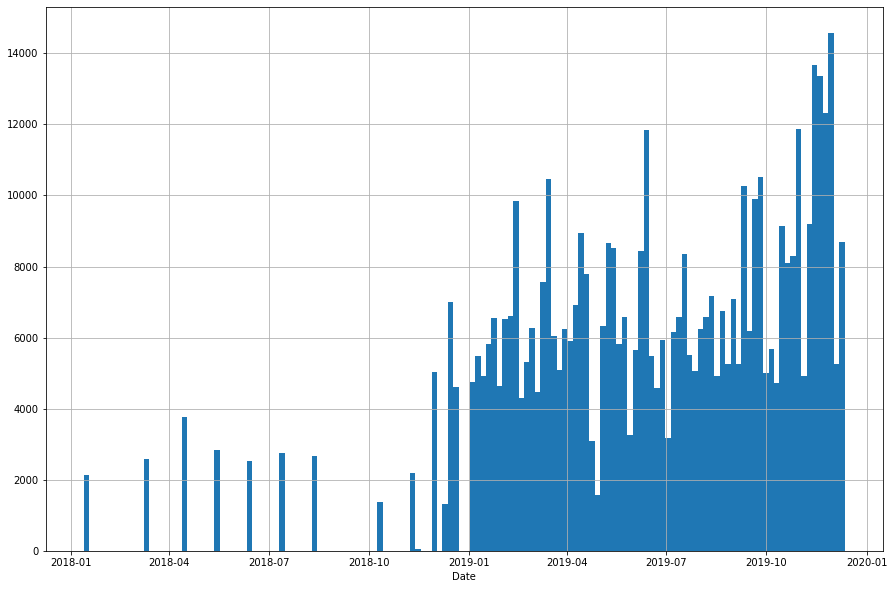

In [69]:
#checking if we have data for the entire period
plt.figure(figsize=(15,10))
ax = ecom_filtered['invoice_date'].hist(bins='auto')
ax.set_xlabel('Date')
plt.show()

Our data includes purchases from January 12th, 2018 until December 11th, 2019 (almost two years),though we can see that most of the data is from 2019, we will focus on this data and remove the 2018 purchases. 
Sunday looks like a short day of work in our store, it's usually a day people spend time with their families and less in shopping. Also, stores usually less hours on Sunday though our store is online so it might not apply to our store.

In [70]:
#removing purchases from 2018
ecom_filtered = ecom_filtered.query('date > "2018-12-31"')

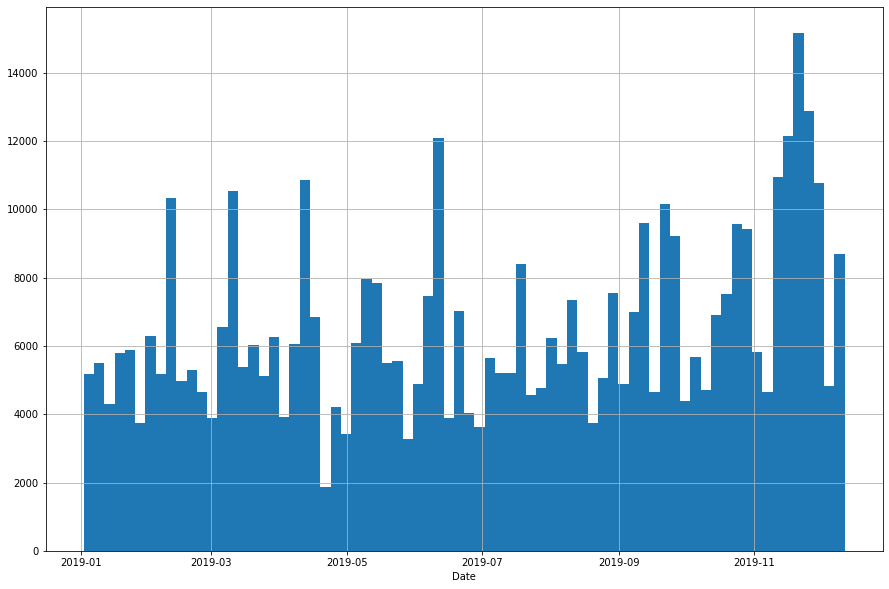

In [71]:
#looking at the data of 2019
plt.figure(figsize=(15,10))
ax = ecom_filtered['invoice_date'].hist(bins='auto')
ax.set_xlabel('Date')
plt.show()

In [72]:
#total number of purchases 
ecom_filtered['invoice_no'].nunique()

18234

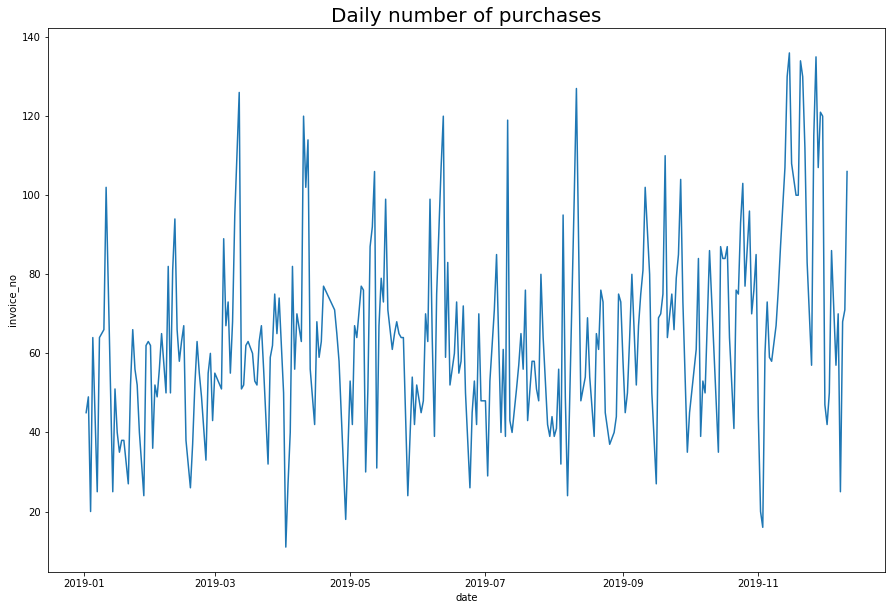

In [73]:
#investigating the number of daily purchases
plt.figure(figsize=(15,10))
plt.title('Daily number of purchases', size = 20)
sns.lineplot(data=ecom_filtered.groupby('date')['invoice_no'].nunique().reset_index()
             , x="date", y="invoice_no")
plt.show()

We can see that the daily purchases vary between 20 to 140 but it is a very noisy chart to look at. We will look also on the monthly number of purchases. 

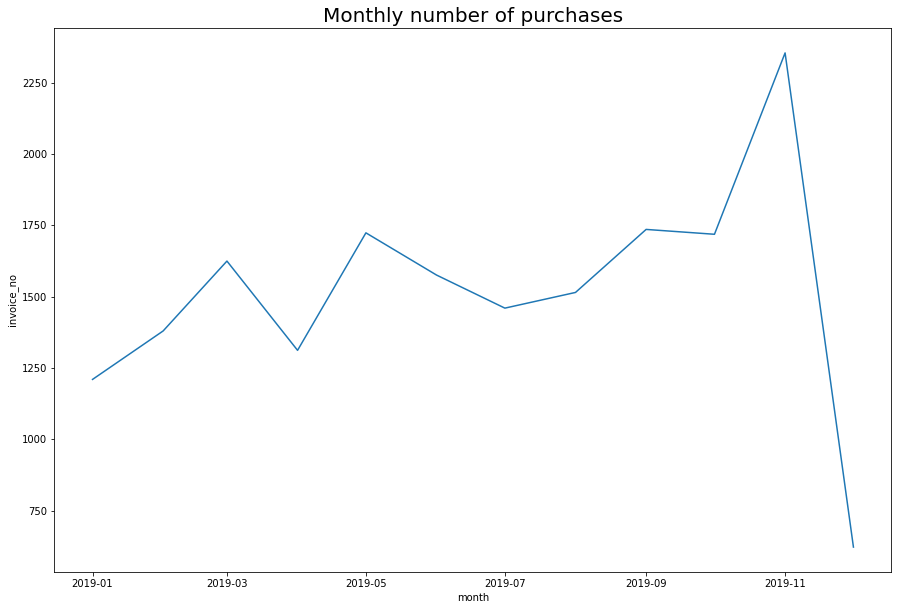

In [74]:
plt.figure(figsize=(15,10))
plt.title('Monthly number of purchases', size = 20)
sns.lineplot(data=ecom_filtered.groupby('month')['invoice_no'].nunique().reset_index()
             , x="month", y="invoice_no")
plt.show()

Looks like there's a positive trend in number of purchases per month, with a maximum on November 2019, probably duw to black friday discounts and getting ready for Christmas.

In [75]:
#total revenue during 2019
ecom_filtered['revenue'].sum()

9174007.514000002

In [76]:
#what is the average revenue per order
ecom_filtered.groupby(['invoice_no'])['revenue'].sum().mean()

503.12644038609193

In [77]:
#what is the average revenue per month
monthly = ecom_filtered.groupby('month')['revenue'].sum().reset_index()
monthly['average_revenue'] = monthly['revenue']/ecom_filtered.groupby('month')['invoice_no'].nunique().reset_index()['invoice_no']
display(monthly.sort_values(by= 'revenue', ascending = False))

month      revenue  average_revenue
10 2019-11-01  1100293.290       467.215834
8  2019-09-01  1033523.702       595.347755
9  2019-10-01   882360.120       513.298499
4  2019-05-01   874296.740       507.132680
2  2019-03-01   817879.060       503.310191
7  2019-08-01   753419.310       497.306475
6  2019-07-01   733205.671       502.195665
5  2019-06-01   715736.420       454.147475
1  2019-02-01   692103.100       501.523986
0  2019-01-01   598330.770       494.488240
3  2019-04-01   590587.821       450.143156
11 2019-12-01   382271.510       614.584421

The yearly revenue is 9,172,695 USD with an average monthly revenue of 503 USD. We can see that the revenue per month is the highest in November (when it's thanksgiving and black friday deals and right before Christmas) and September (back to school deals and Labor day weekend), while the lowest revenue per month is for December (the holiday season is over and everyone already bought gifts). 

As for the average monthly revenue, the highest is for September and December and lowest for April and November (during easter and thanksgiving).

<u> 2.4 When seasons change </u>

In [78]:
#adding a season column to our dataset to divide the year to time periods
def month_to_season(date):
    if date in [3,4,5]:
        return 'spring'
    if date in [6,7,8,]:
        return 'summer'
    if date in [9,10,11]:
        return 'autumn'
    else:
        return 'winter'    

ecom_filtered['season'] = ecom_filtered['month'].dt.month.apply(month_to_season)

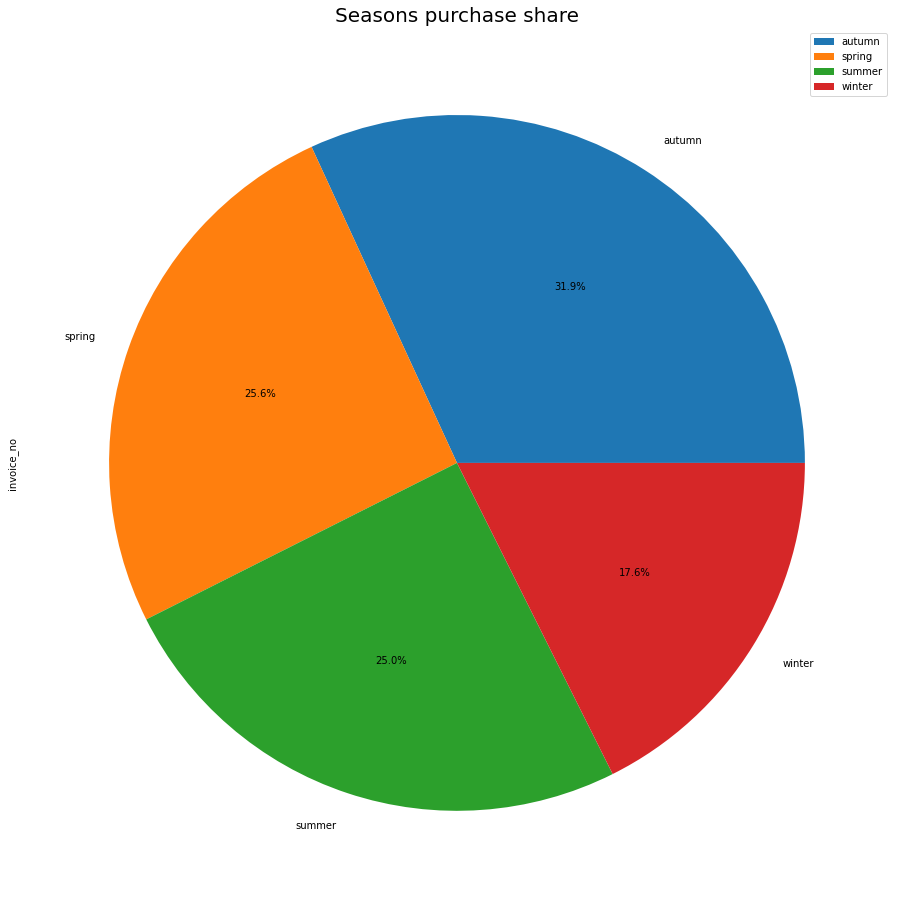

In [79]:
#seasons puchase share in 2019
season_grouped = ecom_filtered.groupby('season')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
                            ascending=False).reset_index().set_index('season')
season_grouped.plot(y='invoice_no', kind='pie', figsize=(16, 16), autopct='%1.1f%%')
plt.title('Seasons purchase share', size=20)
plt.show()

The greatest share of purchases is during the autumn season (the months of September, October, November) during thanksgiving, black friday and getting ready for Christmas as we saw above. 

<u> 2.5 Getting to know our customers </u>

In [80]:
#looking at how many customers do we have
ecom_filtered['customer_id'].nunique()

4213

We have 4213 different customers, we will investigate how many are a fan of our store and returned for a second purchase.

In [81]:
#how many users purchased more than once
ecom_filtered.groupby('customer_id')['invoice_no'].nunique().reset_index().query('invoice_no > 2')

customer_id  invoice_no
0         12347.0           6
1         12348.0           3
4         12352.0           7
8         12356.0           3
11        12359.0           4
...           ...         ...
4198      18263.0           3
4202      18272.0           6
4203      18273.0           3
4211      18283.0          16
4212      18287.0           3

[1903 rows x 2 columns]

We have 1904 returned customers (out of 4213 total) that's almost 50%! 

<u> 2.6 Creating price categories </u>

In [82]:
#creating price groups (very_cheap-very_expensive range of products) 
#defining price levels
very_cheap = np.percentile(ecom_filtered['product_price'], 25)
cheap = np.percentile(ecom_filtered['product_price'], 50)
moderate = np.percentile(ecom_filtered['product_price'], 75)
expensive = np.percentile(ecom_filtered['product_price'], 95)
very_expensive = np.percentile(ecom_filtered['product_price'], 99)

#creating a function to devide the products to different price levels
def price_level(price):
    if price <= very_cheap:
        return 'very_cheap'
    if very_cheap < price <= cheap:
        return 'cheap'
    if cheap < price <= moderate:
        return 'moderate'
    if moderate < price <= expensive:
        return 'expensive'
    if expensive < price <= very_expensive:
        return 'very_expensive'
    return 'most expensive'

#calling the function for our dataset and adding a price_group columns
ecom_filtered['price_group'] = ecom_filtered['product_price'].apply(price_level)
ecom_filtered['price_group'].value_counts()

very_cheap        150830
moderate          125241
cheap              95895
expensive          89677
very_expensive     16091
most expensive      4147
Name: price_group, dtype: int64

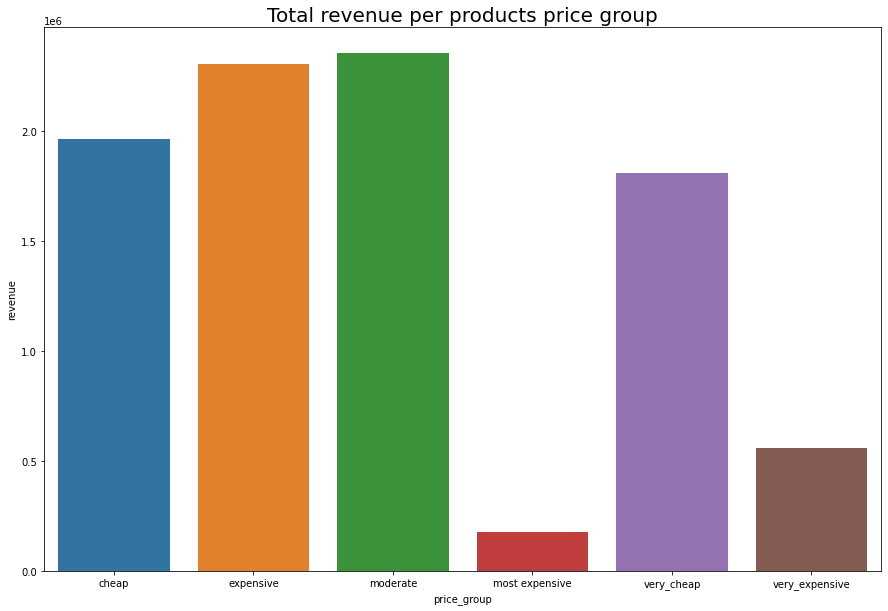

In [83]:
#revenue per product price category
plt.figure(figsize = (15, 10))
sns.barplot(x = 'price_group', y= 'revenue', data = ecom_filtered.groupby('price_group')['revenue'].sum().reset_index())
plt.title('Total revenue per products price group', size =20)
plt.show()

<div class="alert alert-success"> <b>Team Lead comment:</b>That's an interesting idea!</div>

The very_expensive and most_expensive price categories contribute the least to our revenue, maybe we should not invest in these products. 

In [84]:
#do products change categoris?
product_change = ecom_filtered.pivot_table(columns = 'price_group', index = 'product_no', values = 'invoice_no', aggfunc = 'nunique')
display(product_change.head())

price_group  cheap  expensive  moderate  most expensive  very_cheap  \
product_no                                                            
10002          8.0        NaN       NaN             NaN        33.0   
10080          NaN        NaN       NaN             NaN        22.0   
10120          NaN        NaN       NaN             NaN        25.0   
10123C         NaN        NaN       NaN             NaN         2.0   
10124A         NaN        NaN       NaN             NaN         4.0   

price_group  very_expensive  
product_no                   
10002                   NaN  
10080                   NaN  
10120                   NaN  
10123C                  NaN  
10124A                  NaN

In [85]:
#fill nan values with 0
product_change.fillna(0, inplace = True)

In [86]:
#encoding to 0 or 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

product_change01 = product_change.applymap(encode_units)

In [87]:
#summing the rows
product_change01["sum"] = product_change01.sum(axis=1)

In [88]:
#how many products were sold in several price categories
product_change01[product_change01['sum']>=2]

price_group   cheap  expensive  moderate  most expensive  very_cheap  \
product_no                                                             
10002             1          0         0               0           1   
10125             1          0         0               0           1   
10133             1          0         0               0           1   
10135             1          0         1               0           1   
11001             1          0         1               0           1   
...             ...        ...       ...             ...         ...   
90210D            0          0         1               0           1   
BANK CHARGES      0          0         0               0           1   
C2                0          0         0               1           0   
DCGSSBOY          0          0         1               0           1   
DCGSSGIRL         0          0         1               0           1   

price_group   very_expensive  sum  
product_no                         
10002                      0    2  
10125                      0    2  
10133                      0    2  
10135                      0    3  
11001                      0    3  
...                      ...  ...  
90210D                     0    2  
BANK CHARGES               1    2  
C2                         1    2  
DCGSSBOY                   0    2  
DCGSSGIRL                  0    2  

[2567 rows x 7 columns]

Looks like most of our sold products are in the very_cheap - moderate price levels.
Most of our product (2567) change in price and move from one price category to another throughout the year. 

<b> Step 3: Product range analysis: </b>

In [89]:
#how many different products we have?
ecom_filtered['product_no'].nunique()

3822

We have 3822 different products in our dataset.

<u> 3.1 Classify products into categories by similar word in the description</u>

Since we have so many product types we will categorize them so we can analyze them more easily. 
We will use lemmatization to create categories according to the products description. 

In [90]:
#defining the lemmatizer function
def lemmatizer_func(line):
    wordnet_lemma = WordNetLemmatizer()
    word_list = nltk.word_tokenize(line)
    return [w.lower() for w in word_list]

In [91]:
#applying the function to our dataset product description
ecom_filtered['description'] = ecom_filtered['description'].str.replace(".", "")
ecom_filtered['lemmas'] = ecom_filtered['description'].apply(lemmatizer_func)

In [92]:
ecom_filtered.head()

invoice_no product_no                description  quantity  \
42481     539993      22386    jumbo bag pink polkadot        10   
42482     539993      21499         blue polkadot wrap        25   
42483     539993      21498        red retrospot wrap         25   
42484     539993      22379   recycling bag retrospot          5   
42485     539993      20718  red retrospot shopper bag        10   

             invoice_date  product_price customer_id  revenue       date  \
42481 2019-02-01 10:00:00           1.95     13313.0     19.5 2019-02-01   
42482 2019-02-01 10:00:00           0.42     13313.0     10.5 2019-02-01   
42483 2019-02-01 10:00:00           0.42     13313.0     10.5 2019-02-01   
42484 2019-02-01 10:00:00           2.10     13313.0     10.5 2019-02-01   
42485 2019-02-01 10:00:00           1.25     13313.0     12.5 2019-02-01   

           month     day  season price_group                          lemmas  
42481 2019-02-01  Friday  winter       cheap    [jumbo, bag, pink, polkadot]  
42482 2019-02-01  Friday  winter  very_cheap          [blue, polkadot, wrap]  
42483 2019-02-01  Friday  winter  very_cheap          [red, retrospot, wrap]  
42484 2019-02-01  Friday  winter    moderate     [recycling, bag, retrospot]  
42485 2019-02-01  Friday  winter  very_cheap  [red, retrospot, shopper, bag]

In [93]:
#finding the most common words in our lemmas
lemma_count = Counter(c for clist in ecom_filtered['lemmas'] for c in clist)
print(lemma_count.most_common())

[('set', 49559), ('of', 49060), ('bag', 48315), ('red', 38240), ('heart', 35132), ('vintage', 32359), ('retrospot', 31371), ('design', 27157), ('pink', 26686), ('christmas', 21948), ('box', 21517), ('jumbo', 19899), ('metal', 19044), ('cake', 19005), ('white', 18357), ('blue', 17518), ('lunch', 17188), ('3', 16052), ('sign', 15614), ('hanging', 15301), ('holder', 14326), ('pack', 14287), ('card', 13242), ('paper', 13092), ('t-light', 12928), ('small', 12201), ('6', 12037), ('decoration', 11801), ('wooden', 11634), ('polkadot', 11329), ('cases', 11063), ('tea', 11054), ('glass', 10711), ('12', 10444), ('spaceboy', 9913), ('in', 9887), ('and', 9734), ('bottle', 9697), ('pantry', 9186), ('hot', 8787), ('home', 8784), ('with', 8693), ('large', 8607), ('paisley', 8586), ('tin', 8529), ('4', 8399), ('regency', 8301), ('rose', 8279), ('ceramic', 8194), ('green', 8146), ('water', 8062), ('dolly', 7755), ('bunting', 7650), ('doormat', 7615), ('mini', 7564), ('ivory', 7467), ('cream', 7200), ('l

In [94]:
#creating product categories (performed manually)
fashion = ['bag', 'warmer', 'wallet', 'umbrella', 'purse', 'bracelet', 'necklace', 'backpack', 'hat']
kitchen= ['lunch', 'cake', 'tea', 'bottle', 'pantry', 'mug', 'bowl','tins', 'cutlery', 'jam','egg', 
            'baking', 'napkin', 'plate', 'kitchen', 'coffee', 'cookie', 'saucer', 'apron', 'teacup', 
            'dinner', 'pot', 'recipe', 'jug','cutters', 'sugar', 'snack', 'tray','food', 'biscuit','spoons',
            'pan', 'bread', 'popcorn', 'beaker', 'teatime', 'dish', 'oven', 'breakfast', 'washing', 'cups', 
          'plates', 'napkins', 'beakers', 'jar', 'cakestand', 'teapot', 'salt', 'cupcake', 'moulds', 'straws',
         'ladle', 'chopsticks']
home_and_garden= ['holder', 't-light', 't-lights','home', 'doormat', 'clock', 'wicker', 'garden', 'frame', 'wall', 'drawer',
                 'cup', 'candle', 'knob', 'hook', 'cushion', 'light', 'photo', 'babushka', 'box', 'door', 'magnet','magnets',
                 'mirror', 'board', 'lantern','parasol','hanger','table', 'money', 'bathroom', 'basket', 'marker',
                 'word','towel','jigsaw', 'bank', 'sign', 'rack', 'bin', 'wreath', 'soap', 'toilet', 'billboard', 
                  'plant', 'tile', 'calendar','bath', 'cabinet', 'mat', 'pegs',  'windmill', 'lamp', 'drawerknob', 
                  'globe', 'coaster', 'doorsign','lights', 'tool', 'tablecloth', 'cloche', 'candleholder', 'mobile',
                 'chalkboard', 'owls', 'ducks', 'dove','doorstop','gardeners', 'hanging', 'chest', 'chocolatecandle',
                 'coasters', 'placemats', 'pears', 'trellis', 'watering', 'picture', 'crates', 'letters', 'screwdriver',
                 'candles']  
children = ['childrens', 'toy', 'baby', 'kids', 'game', 'playhouse','school', 'dominoes', 'spinning', 'skittles', 
            'snakes', 'bingo', 'skipping', 'gliders', 'crosses', 'ludo', 'spade', 'playing', 'treasure', 'bear']
party_and_decorations = ['bunting', 'party', 'wrap', 'birthday', 'gift', 'ribbon', 'ribbons','chain', 'garland', 'sketchbook', 
                         'ornament', 'balloons', 'greeting', 'decorations', 'decoration', 'tattoos']
holiday= ['christmas', 'easter', 'stocking', 'santa', 'bells', 'jingle']
arts_and_crafts = ['feltcraft', 'pencils', 'felt', 'craft', 'pen', 'notebook', 'sticker', 'stationery', 'tape', 
                   'drawing', 'ruler', 'chalk', 'stamp', 'crayons', 'envelopes', 'pencil', 'scissor', 'knitting',
                  'own', 'calculator', 'doilies', 'clay', 'notebooks', 'erasers', 'alphabet', 'sewing', 'writing', 
                   'clips', 'pens', 'grow', 'postcard', 'stickers', 'envelope', 'card']
travel_and_outdoor = ['travel', 'picnic', 'luggage', 'passport', 'bicycle', 'shopper', 'hammock', 'torch', 'traveling']
vintage = ['vintage', 'retrospot','antique', 'retro']
beauty_and_health = ['plasters', 'tissue','lip','hair', 'tissues', 'emergency', 'pharmacie', 'aid']

In [95]:
#used for creating the categories
#ecom_filtered[ecom_filtered['description'].str.contains('stocking')]

In [96]:
#writing a function to divide the dataset into the product categories above
def category_func(line):
    if any(word in line for word in kitchen):
        return 'kitchen'
    elif any(word in line for word in home_and_garden):
        return 'home_and_garden'
    elif any(word in line for word in children):
        return 'children'
    elif any(word in line for word in fashion):
        return 'fashion'
    elif any(word in line for word in holiday):
        return 'holiday'
    elif any(word in line for word in party_and_decorations):
        return 'party_and_decorations'
    elif any(word in line for word in arts_and_crafts):
        return 'arts_and_crafts'
    elif any(word in line for word in travel_and_outdoor):
        return 'travel_and_outdoor'
    elif any(word in line for word in beauty_and_health):
        return 'beauty_and_health'
    elif any(word in line for word in vintage):
        return 'vintage'
    else:
        return 'other'

In [97]:
# apply the above categorizing function on the lemmas column
ecom_filtered['product_category'] = ecom_filtered['lemmas'].apply(category_func)

In [98]:
#looking at the number of products in each category
ecom_filtered['product_category'].value_counts()

home_and_garden          155864
kitchen                  141620
fashion                   43426
party_and_decorations     34897
arts_and_crafts           32717
other                     22467
holiday                   19207
children                  12686
beauty_and_health          8043
vintage                    6361
travel_and_outdoor         4593
Name: product_category, dtype: int64

In [99]:
#how many product were left unsorted in the "other" category
(ecom_filtered.query('product_category == "other"')['product_no'].nunique()/ecom_filtered['product_no'].nunique())*100

16.09105180533752

Only 16% of product types were left with no category.
We have in total 11 product categories which will help us in the product range analysis. 

In [100]:
#I used these rows for categorizing more products that were on the "other" product category
#ecom_filtered.query('product_category == "other"').groupby('description')['invoice_no'].count().reset_index().sort_values(by='invoice_no', ascending = False).head(50)

In [101]:
#finding the most common words in our lemmas
#other_lemma = Counter(c for clist in ecom_filtered.query('product_category == "other"')['lemmas'] for c in clist)
#print(other_lemma.most_common())

In [102]:
#ecom_filtered[ecom_filtered['description'].str.contains('boom')]

<u> 3.2 Investigating product caterogies</u>

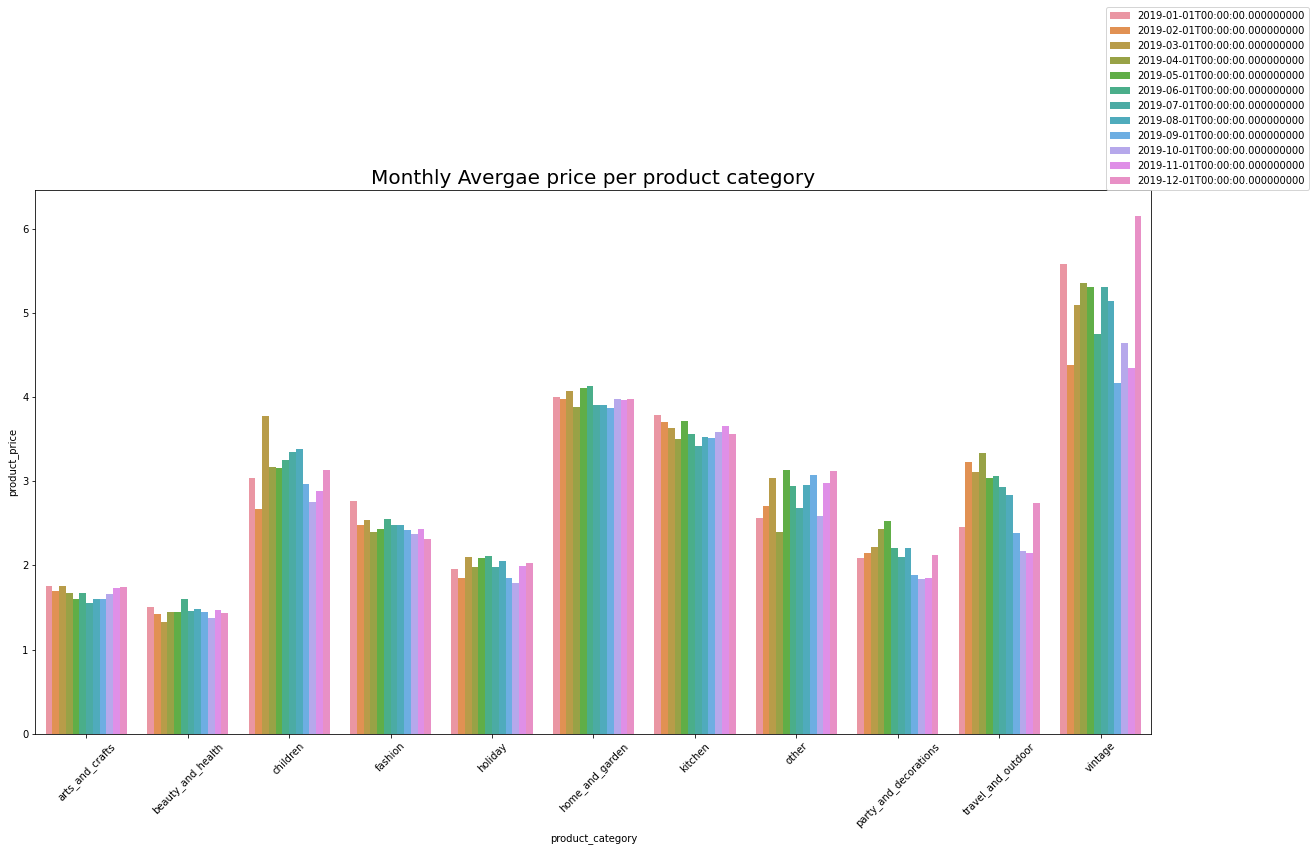

In [103]:
#what is the average price for each product type per month
#we already know that a specific product might have been sold in different price throughout the year, 
price_grouped = ecom_filtered.groupby(['product_category', 'month'])['product_price'].mean().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='product_category', y='product_price', data=price_grouped, hue='month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower center', borderaxespad=0)
plt.title('Monthly Avergae price per product category', size= 20)
plt.xticks(rotation = 45) 
plt.show()

It looks like most of the products monthly average price doesn't change much, there are some variations in the following categories:

1. children
2. party and decorations
3. travel and outdoor
4. vintage
5. other

It is surprising that the holiday category doesn't change much. 

<div class="alert alert-success"> <b>Team Lead comment:</b>Great job!</div>

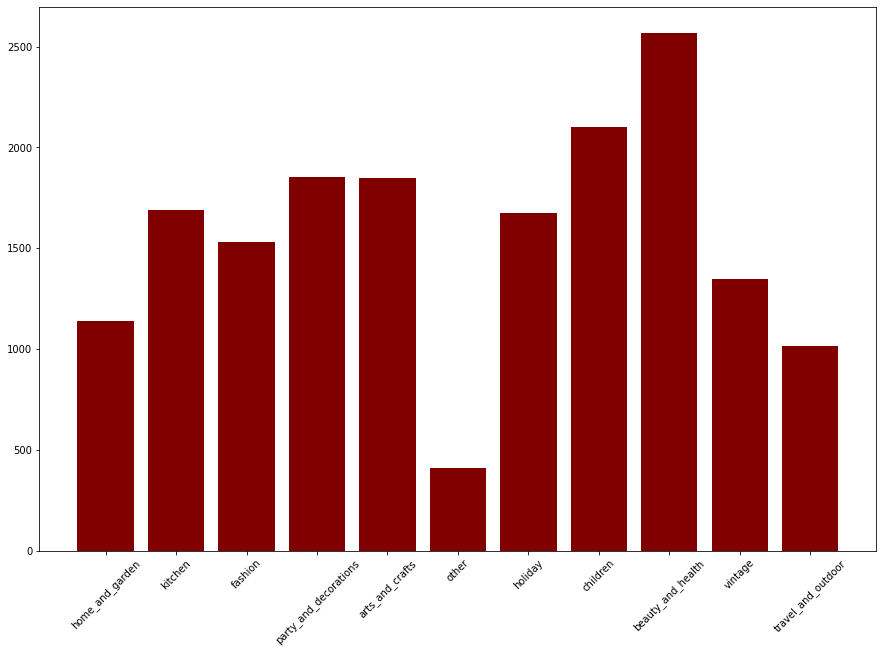

In [104]:
#which type of products are sold in high quantities (relative to the number of products in the category)
quantity_grouped = ecom_filtered.groupby('product_category')['quantity'].sum().reset_index().sort_values(by= 'quantity', ascending = False)
quantity_grouped['relative_quantity'] = quantity_grouped['quantity']/ecom_filtered.groupby('product_category')['product_no'].nunique().reset_index()['product_no']
plt.figure(figsize= (15,10))
plt.bar(quantity_grouped['product_category'], quantity_grouped['relative_quantity'], color= 'maroon')
plt.xticks(rotation = 45) 
plt.show()

Beauty and health products are sold in high quantities per product, followed by children products.

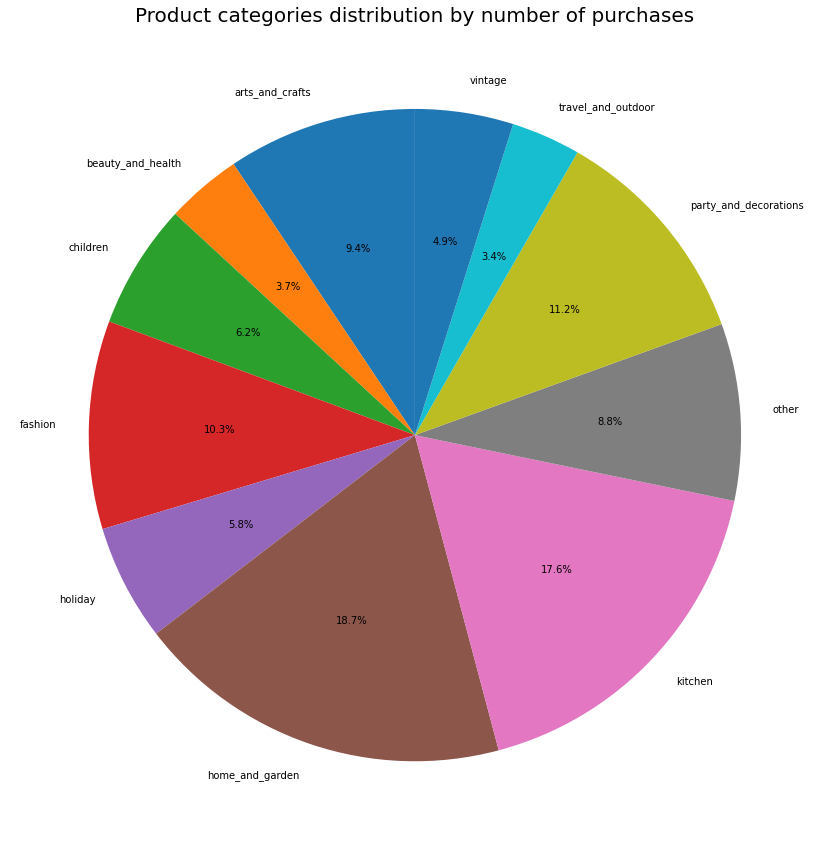

In [105]:
#the number of purchases per product type
invoice_grouped = ecom_filtered.groupby('product_category')['invoice_no'].nunique().reset_index()
plt.figure(figsize=(15,15))
plt.pie(invoice_grouped['invoice_no'], labels = invoice_grouped['product_category'],autopct='%1.1f%%', startangle = 90)
plt.title('Product categories distribution by number of purchases', size = 20)
plt.show()

The Home & Garden and Kitchen categories take the greatest share of our purchases. While Travel & Outdoor and beauty & health take the smallest share.

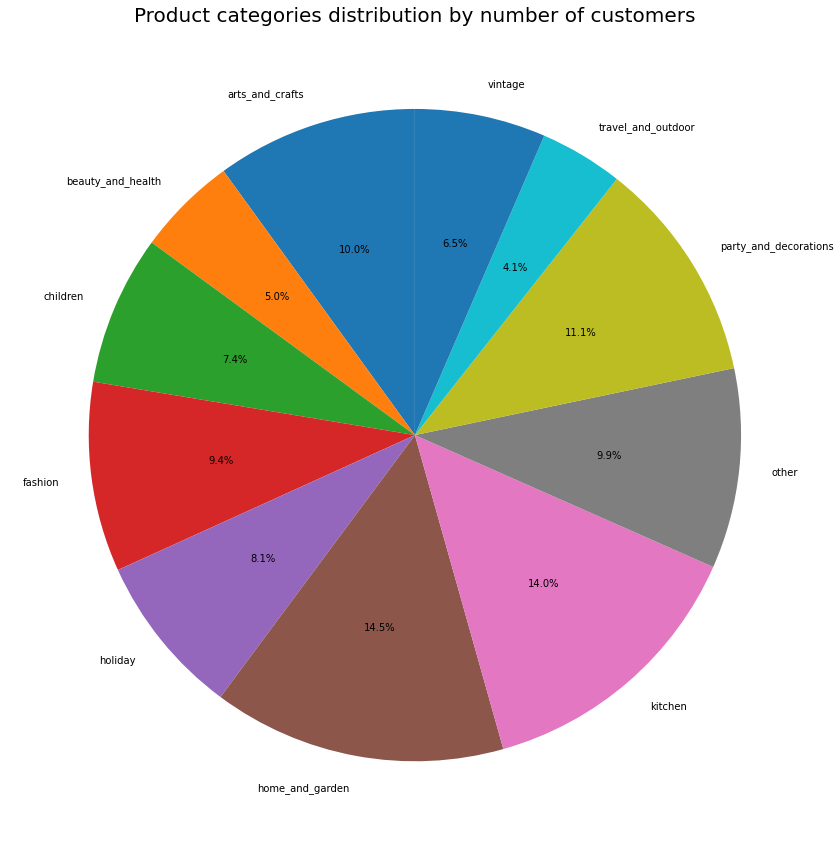

In [106]:
#the number of customers who bought each product
customer_grouped = ecom_filtered.groupby('product_category')['customer_id'].nunique().reset_index()
plt.figure(figsize=(15,15))
plt.pie(customer_grouped['customer_id'], labels = customer_grouped['product_category'],autopct='%1.1f%%', startangle = 90)
plt.title('Product categories distribution by number of customers', size = 20)
plt.show()

Here as well we can see the same trend with the customers, most of our customers are looking for Home & Garden or Kitchen products.

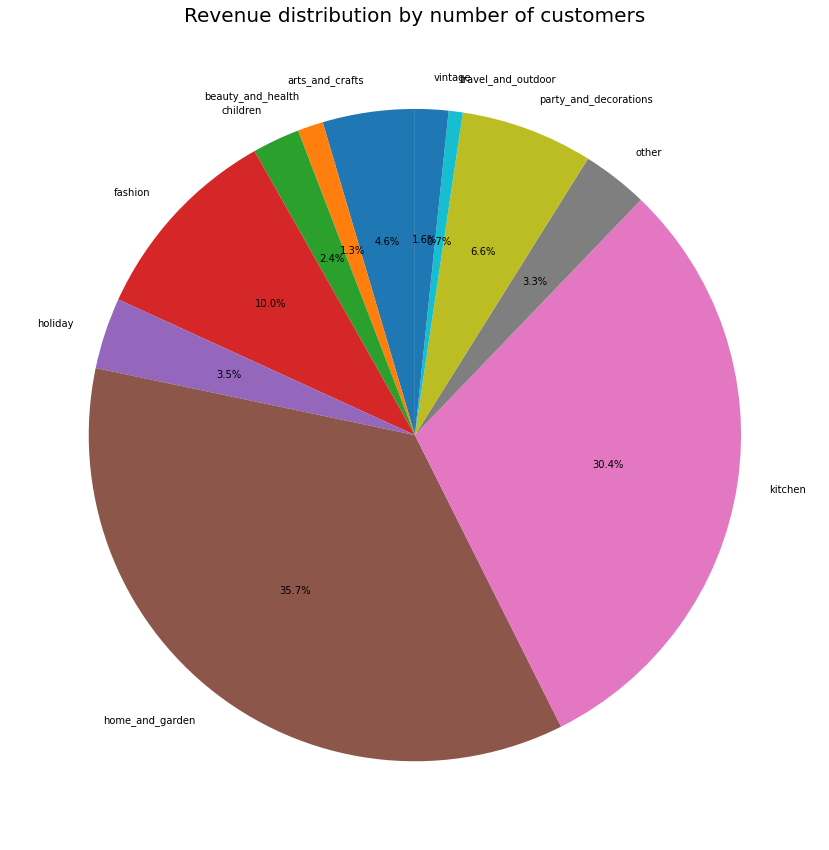

In [107]:
#the revenue from each product
rev_grouped = ecom_filtered.groupby('product_category')['revenue'].sum().reset_index()
plt.figure(figsize=(15,15))
plt.pie(rev_grouped['revenue'], labels = rev_grouped['product_category'],autopct='%1.1f%%', startangle = 90)
plt.title('Revenue distribution by number of customers', size = 20)
plt.show()

<b> Step 4: Product RFM analysis </b>

I will perform RFM analysis on the different products we have, I will look for the last time each product was purchased (Recency), the number of times it was purchased (Frequency) and the total revenue we made due to this product's purchases (Monetary). 

I will start by generating the table we need for the RFM analysis

<u> 4.1 Calculate products recency, frequency, monetary values </u>

In [108]:
#today's date for the calculation of recency
endofyear = dt.datetime(2019,12,31)
endofyear

datetime.datetime(2019, 12, 31, 0, 0)

In [109]:
#generating the rfm table
rfm=ecom_filtered.groupby('product_no').agg({
    'invoice_date': lambda x: (endofyear-x.max()).days,
    'invoice_no': 'count',
    'revenue':'sum'
}).reset_index()
#changing columns names
rfm.rename(columns = {'product_no':'product_no', 'invoice_date':'recency', 'invoice_no':'frequency', 'revenue':'monetary'}, inplace = True)
display(rfm)

product_no  recency  frequency  monetary
0            10002       58         41    525.48
1            10080       19         22    119.09
2            10120       32         25     36.96
3           10123C      276          2      2.60
4           10124A      211          4      5.04
...            ...      ...        ...       ...
3817  gift_0001_10      123          8     74.97
3818  gift_0001_20       59          9    167.05
3819  gift_0001_30      121          7    175.53
3820  gift_0001_40      158          2     66.66
3821  gift_0001_50      185          3    125.01

[3822 rows x 4 columns]

Before we start the segmentation we will check if the RFM data is distributed noramlly so we can use the quantile clssic method for segmenation.

In [110]:
for i in rfm.columns:
    if i=='product_no':
        continue
    else: 
        plot_data=[
            go.Histogram(x=rfm[i])
        ]
        plot_layout=go.Layout(title=i)
        fig=go.Figure(data=plot_data,layout=plot_layout)
        pyoff.iplot(fig)

We can see that all our columns are skewed to the right, hence it will not be correct to use quantiles for the rfm segmentation, I will use KMeans segmentation instead.

In [111]:
#standerdazing the data
scaler = StandardScaler()
rfm_normalized = rfm[['recency','frequency', 'monetary']]
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.columns = ['recency','frequency', 'monetary']
rfm_normalized

recency  frequency  monetary
0     0.278688  -0.463310 -0.317398
1    -0.424141  -0.566775 -0.386197
2    -0.189864  -0.550439 -0.400101
3     4.207321  -0.675686 -0.405918
4     3.035940  -0.664795 -0.405505
...        ...        ...       ...
3817  1.450070  -0.643012 -0.393666
3818  0.296709  -0.637567 -0.378078
3819  1.414027  -0.648458 -0.376642
3820  2.080814  -0.675686 -0.395073
3821  2.567387  -0.670240 -0.385195

[3822 rows x 3 columns]

<u> 4.2 Perform product segmentation according to their RFM using KMeans </u>

In [112]:
#using the silhouette score to find the number of clusters best fitted to our data
#building the function for getting the number of clusters according to highest silhouette score
def cluster_solution(parameter):
    score={}
    for n_cluster in [2,3,4,5,6]:
        kmeans = KMeans(n_clusters=n_cluster).fit(
            rfm_normalized[[parameter]])
    
        silhouette_avg = silhouette_score(
            rfm_normalized[[parameter]], 
            kmeans.labels_)
        score[n_cluster]=silhouette_avg
    needed_number=max(score,key=score.get)
    return needed_number

In [113]:
#iterating over the columns and getting back the optimal number of clusters
for i in rfm_normalized[['recency','frequency','monetary']].columns:
    print(i, cluster_solution(i))

recency 2
frequency 2
monetary 2


According to the silhouette score we should use 2 clusters for our data.

In [114]:
#using KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, max_iter = 50).fit(rfm_normalized[['recency', 'frequency', 'monetary']])

In [115]:
#returning the product_no column to the dataframe
rfm_normalized.loc[:,'product_no'] = rfm['product_no']

In [116]:
#addind the cluster number for each product
rfm_normalized['cluster'] = kmeans.labels_
display(rfm_normalized)

recency  frequency  monetary    product_no  cluster
0     0.278688  -0.463310 -0.317398         10002        0
1    -0.424141  -0.566775 -0.386197         10080        0
2    -0.189864  -0.550439 -0.400101         10120        0
3     4.207321  -0.675686 -0.405918        10123C        0
4     3.035940  -0.664795 -0.405505        10124A        0
...        ...        ...       ...           ...      ...
3817  1.450070  -0.643012 -0.393666  gift_0001_10        0
3818  0.296709  -0.637567 -0.378078  gift_0001_20        0
3819  1.414027  -0.648458 -0.376642  gift_0001_30        0
3820  2.080814  -0.675686 -0.395073  gift_0001_40        0
3821  2.567387  -0.670240 -0.385195  gift_0001_50        0

[3822 rows x 5 columns]

In [117]:
#how many products we have in each cluster
rfm_normalized['cluster'].value_counts()

0    3514
1     308
Name: cluster, dtype: int64

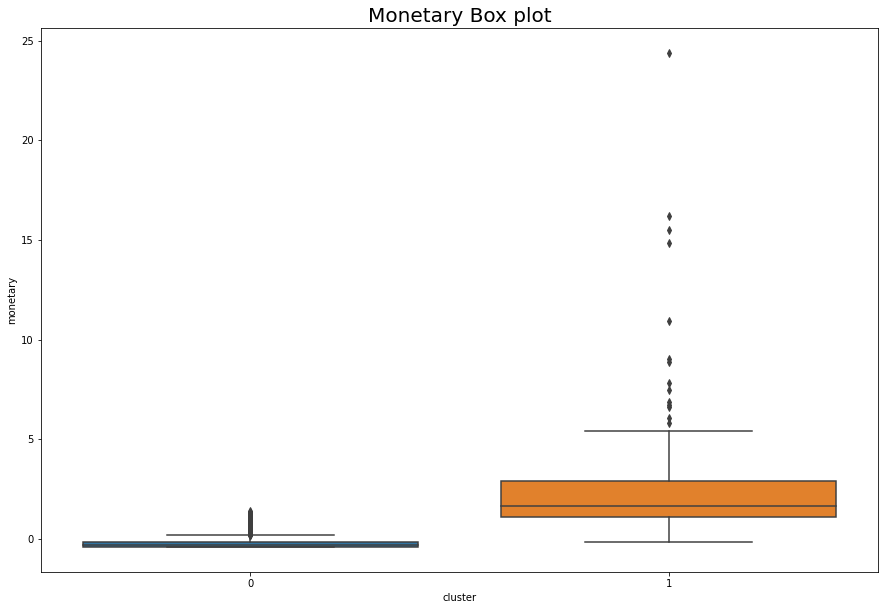

In [118]:
#monetary box plot
plt.figure(figsize = (15,10))
sns.boxplot(x='cluster', y='monetary', data = rfm_normalized)
plt.title('Monetary Box plot', size = 20)
plt.show()

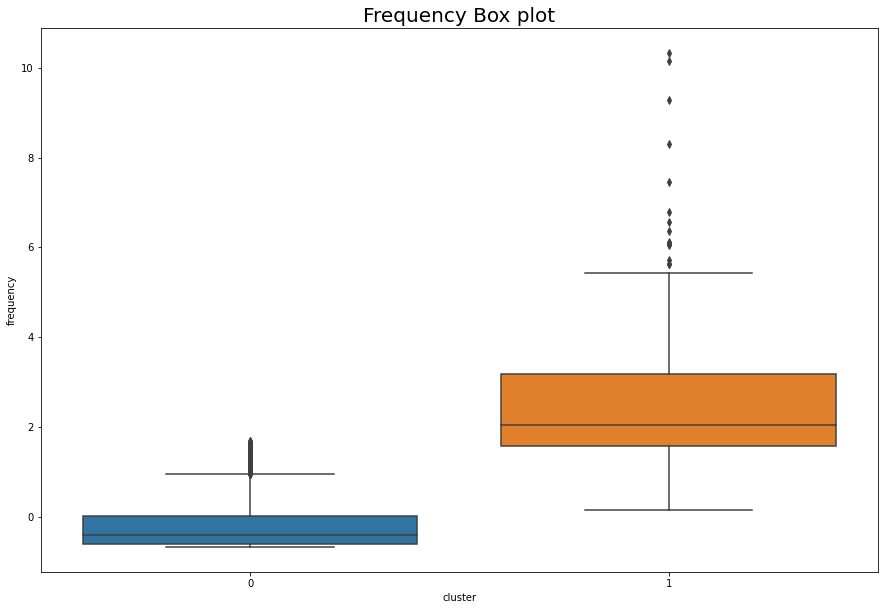

In [119]:
#frequency box plot
plt.figure(figsize = (15,10))
sns.boxplot(x='cluster', y='frequency', data = rfm_normalized)
plt.title('Frequency Box plot', size = 20)
plt.show()

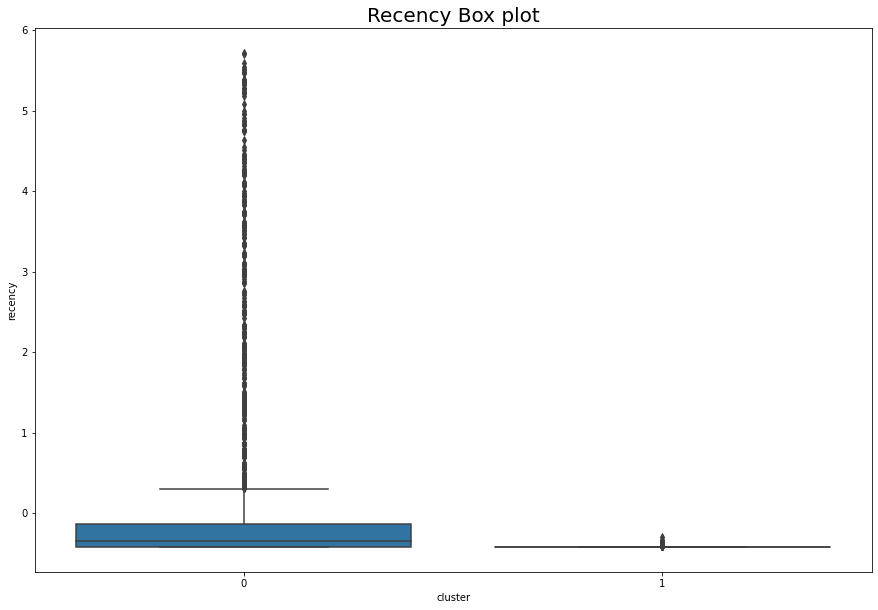

In [120]:
#Recency box plot
plt.figure(figsize = (15,10))
sns.boxplot(x='cluster', y='recency', data = rfm_normalized)
plt.title('Recency Box plot', size = 20)
plt.show()

We divided our products into 2 clusters. The majority of the products (3514) in group 0, are products with low monetary, low frequency of purchases, and greater recency - in general, it's not so good that the majority of our products are like that. we have additional 308 products in group 0 with higher monetary values, higher frequenct of purchase and lower recency - better for business. 

We will investigate more which products belog to each group and see where we should expand our business.

Also, we can see that the recency for group 0 have many outliars, maybe we have many products that are not in stock anymore and their recency is high because of that, or on the other hand they are in stock and people are just not intrested in them any more (they are not in fashion any more, out dated). 

<u> 4.3 Clusters visualization </u>

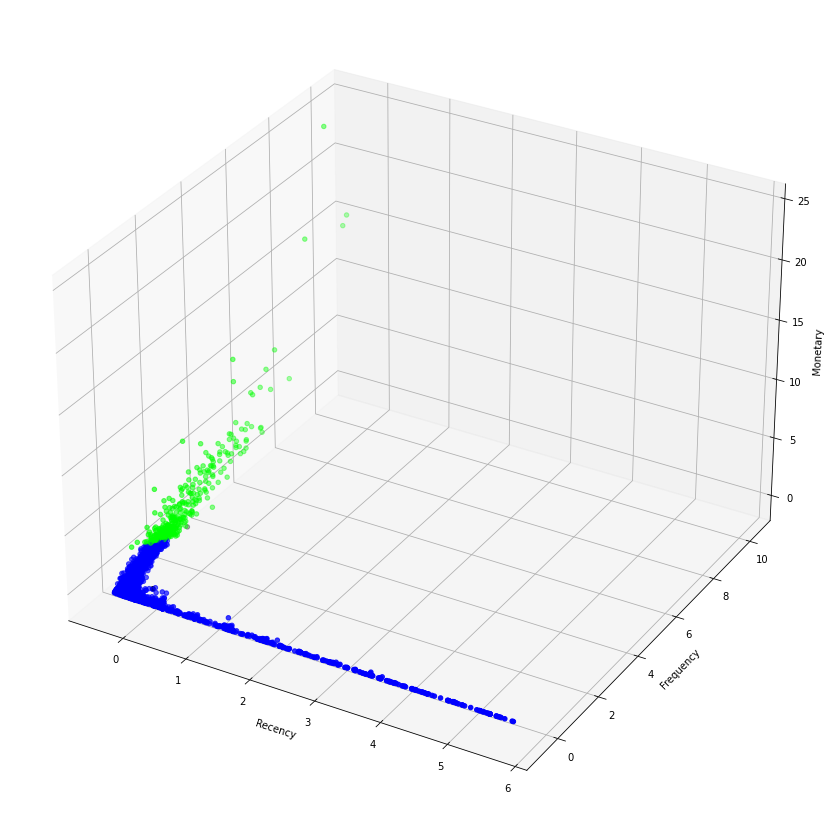

In [121]:
#plotting the KMeans clusters
centers = kmeans.cluster_centers_
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(rfm_normalized['recency'], rfm_normalized['frequency'], rfm_normalized['monetary'], cmap='brg', c=kmeans.predict(rfm_normalized[['recency', 'frequency', 'monetary']]))
ax.scatter(centers[:,0], centers[:,1], c='black')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [122]:
#adding the cluster number of each product to our ecom_filtered table
rfm_clusters = rfm_normalized[['product_no', 'cluster']]
ecom_merg = pd.merge(ecom_filtered, rfm_clusters, how='left', on='product_no')
display(ecom_merg.head())

invoice_no product_no                description  quantity  \
0     539993      22386    jumbo bag pink polkadot        10   
1     539993      21499         blue polkadot wrap        25   
2     539993      21498        red retrospot wrap         25   
3     539993      22379   recycling bag retrospot          5   
4     539993      20718  red retrospot shopper bag        10   

         invoice_date  product_price customer_id  revenue       date  \
0 2019-02-01 10:00:00           1.95     13313.0     19.5 2019-02-01   
1 2019-02-01 10:00:00           0.42     13313.0     10.5 2019-02-01   
2 2019-02-01 10:00:00           0.42     13313.0     10.5 2019-02-01   
3 2019-02-01 10:00:00           2.10     13313.0     10.5 2019-02-01   
4 2019-02-01 10:00:00           1.25     13313.0     12.5 2019-02-01   

       month     day  season price_group                          lemmas  \
0 2019-02-01  Friday  winter       cheap    [jumbo, bag, pink, polkadot]   
1 2019-02-01  Friday  winter  very_cheap          [blue, polkadot, wrap]   
2 2019-02-01  Friday  winter  very_cheap          [red, retrospot, wrap]   
3 2019-02-01  Friday  winter    moderate     [recycling, bag, retrospot]   
4 2019-02-01  Friday  winter  very_cheap  [red, retrospot, shopper, bag]   

        product_category  cluster  
0                fashion        1  
1  party_and_decorations        0  
2  party_and_decorations        0  
3                fashion        1  
4                fashion        1

In [123]:
#creating datasets for each group
group0= ecom_merg.query('cluster == 0')
group1= ecom_merg.query('cluster == 1')

In [124]:
#calculating the average revenue for each cluster per month
cluster_revenue = ecom_merg.groupby(['cluster', 'month'])['revenue'].mean().reset_index()
fig = px.line(cluster_revenue, x="month", y="revenue",color = 'cluster', title = 'Avergae revenue changes through time per cluster')
fig.show()

We can see that even though group 0 has more product types the revenue from these products is lower than product 1.

In [125]:
#calculating the average quntity sold per product and month for each cluster 
cluster_purchases = ecom_merg.groupby(['cluster', 'month'])['quantity'].mean().reset_index()
fig = px.line(cluster_purchases, x="month", y="quantity",color = 'cluster', title = 'Avergae quantity sold through time per cluster')
fig.show()

The number of purchases per cluster looks the same throughout the year, though we saw a difference when calculating the frequency

In [126]:
#calculating the avergae price of products for each cluster per month
cluster_price = ecom_merg.groupby(['cluster', 'month'])['product_price'].mean().reset_index()
fig = px.line(cluster_price, x="month", y="product_price",color = 'cluster', title = 'Average product price through time per cluster')
fig.show()

We can see that for both groups the average product price change through the year, though the. trend is not the same between the groups.

In [127]:
#looking at products with low demand
product_r = group0.groupby(['product_no', 'month'])['invoice_no'].nunique().reset_index()
product_r.query('invoice_no ==1').count()/product_r.shape[0]

product_no    0.167454
month         0.167454
invoice_no    0.167454
dtype: float64

16% of the product in group 0 were only purchased 1 time, we should reconsider if we want to have these products in stock, seems like there's no demand for them. 

In [128]:
#looking at prosucts that were not purchased in the recent months
product_m = group0.groupby(['product_no'])['date'].max().reset_index()
product_m.query('date < "2019-07-01"').count()

product_no    173
date          173
dtype: int64

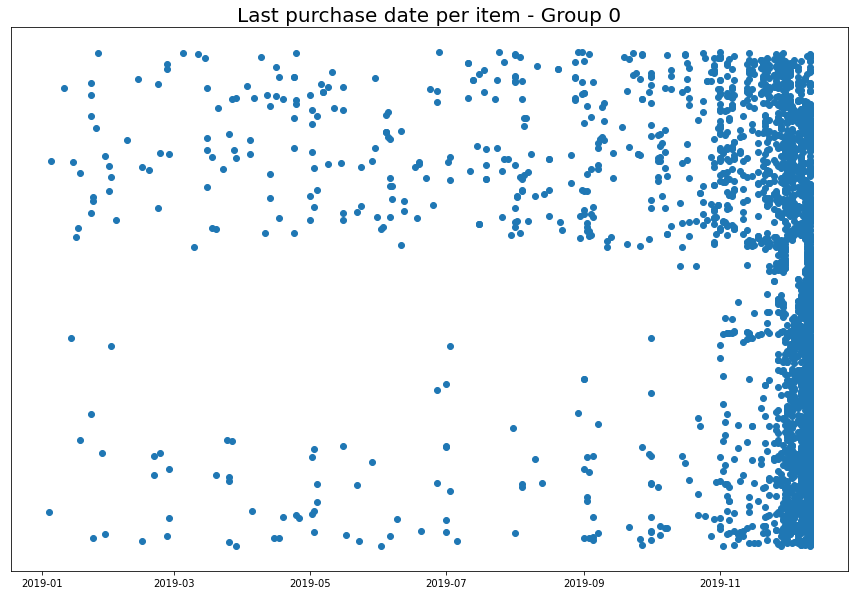

In [129]:
#loking at the last day each product was sold (for group 0)
fig = plt.figure(figsize = (15, 10))
plt.scatter('date', 'product_no', data = product_m)
plt.title('Last purchase date per item - Group 0', size = 20)
plt.yticks([])
plt.show()

We have 173 products that weren't sold in the last 6 months. If it's not from the reason of Out of stock product than we should consider to stop selling these. 

We should notice that if these products belong to a specific theme (like easter products, which is relevant to April) we should keep them in stock for next year.

<b> Step 5: Invoice analysis </b>

<u> 5.1 Investigating different invoices </u>

In [130]:
#investigate different invoices
invoice_types = ecom_merg.groupby(['invoice_no', 'month']).agg({'revenue':'sum', 'product_no':'nunique', 'product_category':'nunique'}).reset_index()
display(invoice_types.describe())

revenue    product_no  product_category
count  18234.000000  18234.000000      18234.000000
mean     503.126440     26.164912          4.602117
std     1124.812836     45.308903          2.583316
min        0.380000      1.000000          1.000000
25%      153.562500      7.000000          2.000000
50%      303.560000     16.000000          4.000000
75%      487.160000     29.000000          6.000000
max    52940.940000   1109.000000         11.000000

Our invoices include betweeb 1 to ~1000 products, range in revenue between 0.4 USD to 52,940 USD and include between 1 to 11 product categories. 
We will look at the boxplots for revenue and product quantity per invoice. 

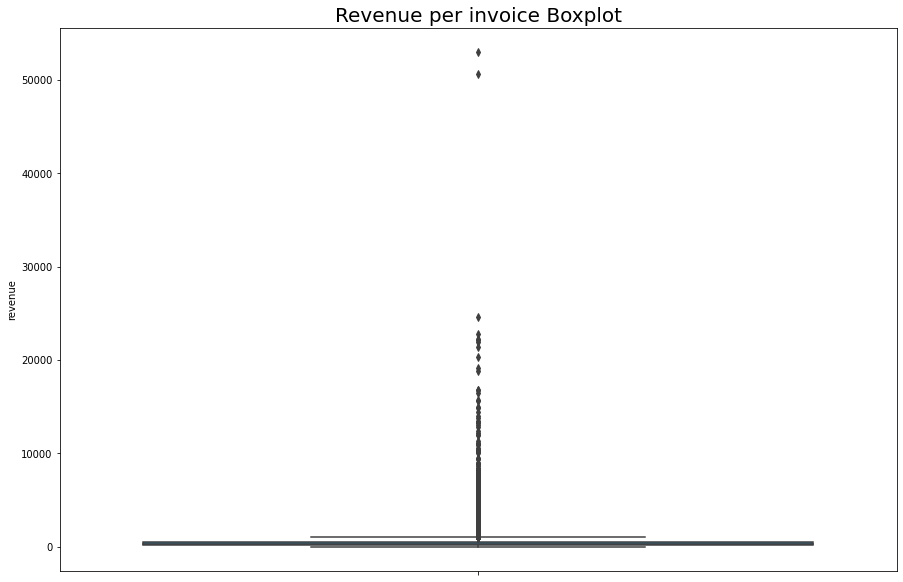

In [131]:
#Create a box plot for revenue
plt.figure(figsize = (15,10))
sns.boxplot(y='revenue', data = invoice_types)
plt.title('Revenue per invoice Boxplot', size = 20)
plt.show()

I will remove the outliars for better visualization 

In [132]:
#calculating the 95th percentile
low = .05
high = .95
revenue_q = invoice_types['revenue'].quantile([low, high])
display(revenue_q)

0.05      27.2655
0.95    1493.5060
Name: revenue, dtype: float64

In [133]:
#how many invoice with revenue > 1500 do we have
invoice_types.query('revenue >1500')['invoice_no'].count()

905

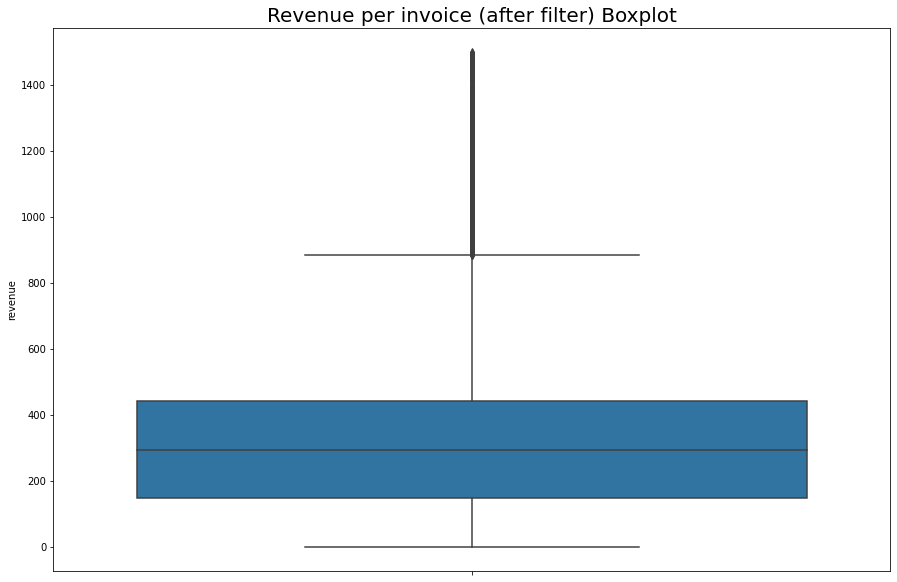

In [134]:
#removing the invoice with revenue greater than the 95th percentile
invoice_types_f = invoice_types.query('revenue <1500')
plt.figure(figsize = (15,10))
sns.boxplot(y='revenue', data = invoice_types_f)
plt.title('Revenue per invoice (after filter) Boxplot', size = 20)
plt.show()

The majority of our invoices are with revenue of less then 1000 USD.

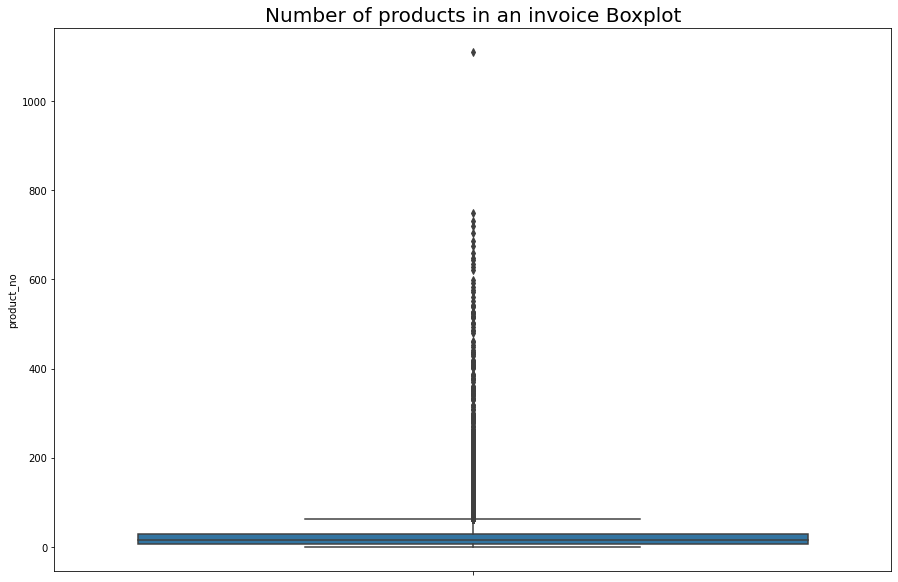

In [135]:
#Create a boxplot for number of items in a purchase
plt.figure(figsize = (15,10))
sns.boxplot(y='product_no', data = invoice_types)
plt.title('Number of products in an invoice Boxplot', size = 20)
plt.show()

In [136]:
#calculating the 95th percentile
low = .05
high = .95
quantity_q = invoice_types['product_no'].quantile([low, high])
display(quantity_q)

0.05     1.0
0.95    76.0
Name: product_no, dtype: float64

In [137]:
#how many invoice with quantity > 76 do we have
invoice_types.query('product_no > 76')['invoice_no'].count()

902

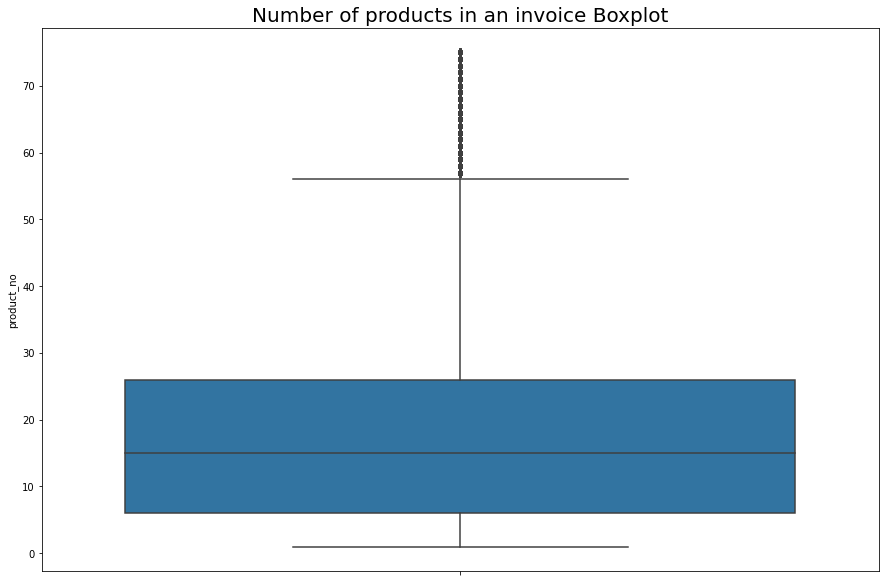

In [138]:
#removing the invoice with quantity greater than the 95th percentile
invoice_types_ff = invoice_types.query('product_no < 76')
plt.figure(figsize = (15,10))
sns.boxplot(y='product_no', data = invoice_types_ff)
plt.title('Number of products in an invoice Boxplot', size = 20)
plt.show()

The majority of our invoices includes up to 60 products per purchase.

I will investigate the connection between the number of products in a purchase to the revenue of that purchase.

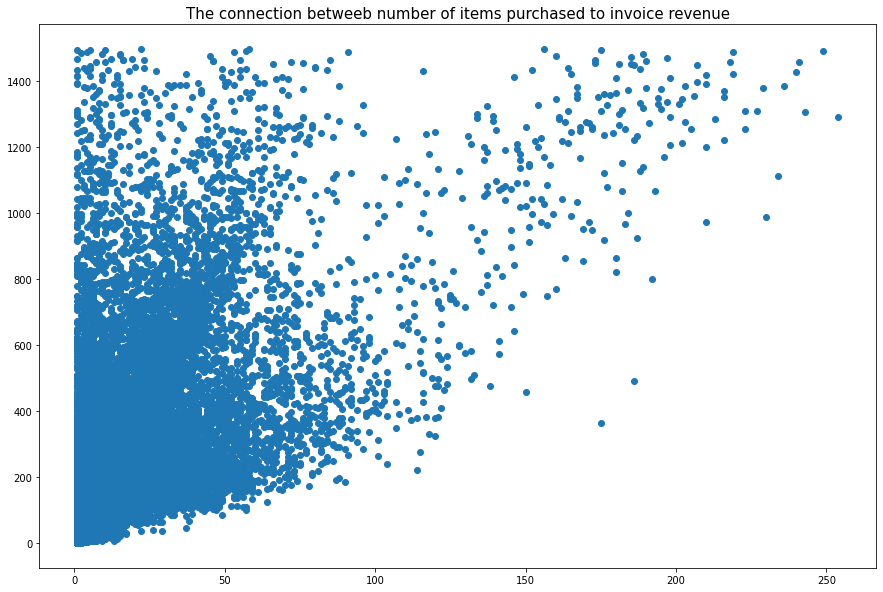

In [139]:
#creating a scatterplot
fig = plt.figure(figsize = (15, 10))
plt.scatter('product_no', 'revenue', data = invoice_types_f)
plt.title('The connection betweeb number of items purchased to invoice revenue', size = 15)
plt.show()

We can see some correcflation between invoices with high number of products to high revenue, yet there are invoices with high revenue and low number of products. We will investigate the connection more later on.

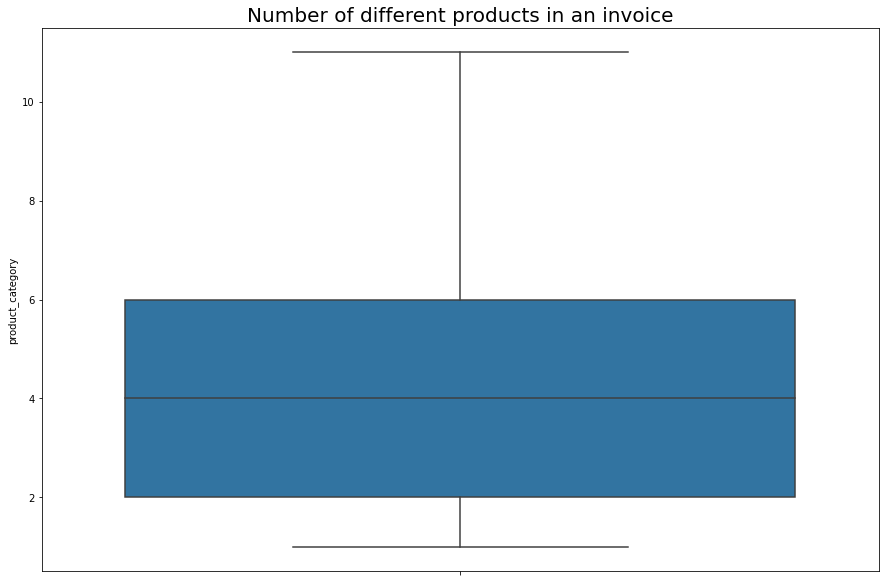

In [140]:
#Create a box plot for number of different product categories in each invoice
plt.figure(figsize = (15,10))
sns.boxplot(y='product_category', data = invoice_types)
plt.title('Number of different products in an invoice', size = 20)
plt.show()

Half of our invoices include betwwn 2 to 6 categories.

<u> 5.2 Apriori Basket Analysis </u>

In [141]:
#Creating the basket dataset
purchases = ecom_merg.groupby(['invoice_no', 'description'])['description'].count().reset_index(name ='count')
basket = (purchases
          .groupby(['invoice_no', 'description'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))

display(basket.head())

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_no                                                                    
539993                                  0.0                             0.0   
540001                                  0.0                             0.0   
540002                                  0.0                             0.0   
540003                                  0.0                             0.0   
540004                                  0.0                             0.0   

description   dolly girl beaker   i love london mini backpack  \
invoice_no                                                      
539993                      0.0                           0.0   
540001                      0.0                           0.0   
540002                      0.0                           0.0   
540003                      0.0                           0.0   
540004                      0.0                           0.0   

description   nine drawer office tidy   oval wall mirror diamante   \
invoice_no                                                           
539993                            0.0                          0.0   
540001                            0.0                          0.0   
540002                            0.0                          0.0   
540003                            0.0                          0.0   
540004                            0.0                          0.0   

description   red spot gift bag large   set 2 tea towels i love london   \
invoice_no                                                                
539993                            0.0                               0.0   
540001                            0.0                               0.0   
540002                            0.0                               0.0   
540003                            0.0                               0.0   
540004                            0.0                               0.0   

description   spaceboy baby gift set   trellis coat rack  ...  \
invoice_no                                                ...   
539993                           0.0                 0.0  ...   
540001                           0.0                 0.0  ...   
540002                           0.0                 0.0  ...   
540003                           0.0                 0.0  ...   
540004                           0.0                 0.0  ...   

description  zinc herb garden container  zinc metal heart decoration  \
invoice_no                                                             
539993                              0.0                          0.0   
540001                              0.0                          0.0   
540002                              0.0                          0.0   
540003                              0.0                          0.0   
540004                              0.0                          0.0   

description  zinc sweetheart soap dish  zinc sweetheart wire letter rack  \
invoice_no                                                                 
539993                             0.0                               0.0   
540001                             0.0                               0.0   
540002                             0.0                               0.0   
540003                             0.0                               0.0   
540004                             0.0                               0.0   

description  zinc t-light holder star large  zinc t-light holder stars small  \
invoice_no                                                                     
539993                                  0.0                              0.0   
540001                                  0.0                              0.0   
540002                                  0.0                              0.0   
540003                                  0.0                              0.0   

In [142]:
#changing the number of items purchased from a specific type to 1 (we only need to know if it was purchased and not how many)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [143]:
display(basket_sets.head())

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_no                                                                    
539993                                    0                               0   
540001                                    0                               0   
540002                                    0                               0   
540003                                    0                               0   
540004                                    0                               0   

description   dolly girl beaker   i love london mini backpack  \
invoice_no                                                      
539993                        0                             0   
540001                        0                             0   
540002                        0                             0   
540003                        0                             0   
540004                        0                             0   

description   nine drawer office tidy   oval wall mirror diamante   \
invoice_no                                                           
539993                              0                            0   
540001                              0                            0   
540002                              0                            0   
540003                              0                            0   
540004                              0                            0   

description   red spot gift bag large   set 2 tea towels i love london   \
invoice_no                                                                
539993                              0                                 0   
540001                              0                                 0   
540002                              0                                 0   
540003                              0                                 0   
540004                              0                                 0   

description   spaceboy baby gift set   trellis coat rack  ...  \
invoice_no                                                ...   
539993                             0                   0  ...   
540001                             0                   0  ...   
540002                             0                   0  ...   
540003                             0                   0  ...   
540004                             0                   0  ...   

description  zinc herb garden container  zinc metal heart decoration  \
invoice_no                                                             
539993                                0                            0   
540001                                0                            0   
540002                                0                            0   
540003                                0                            0   
540004                                0                            0   

description  zinc sweetheart soap dish  zinc sweetheart wire letter rack  \
invoice_no                                                                 
539993                               0                                 0   
540001                               0                                 0   
540002                               0                                 0   
540003                               0                                 0   
540004                               0                                 0   

description  zinc t-light holder star large  zinc t-light holder stars small  \
invoice_no                                                                     
539993                                    0                                0   
540001                                    0                                0   
540002                                    0                                0   
540003                                    0                                0   

In [ ]:
#performing the apiori analysis on the basket sets we have
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

In [ ]:
#looking at item/sets with highest support
display(frequent_itemsets.sort_values(by = 'support', ascending = False))

In [ ]:
#association rules - calculating lift > 1
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)

In [ ]:
display(rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.6)])

These are the top combinations of products sorted by the confidence (60%) that if you bought product A you will probably get product B and lift >6. 

Also, the uplift for all the above sets is very high which means we should offer them the second item since they are more likely to get both than just the first. 

We can see that people tend to buy similar products together with a change in color/design, this means we can promot buy 2 get 1 or similar on products like:
1. regency teatcup and saucer
2. junmbo bag
3. gardeners kneeling pad
4. charlotte bag
5. wooden christmas decoration (heart, star, etc')
6. alarm clock bakelike
7. lunch boxes
8. paper chains
9. t-light holder

Even though the share of these transactions from the total is not high (around the 2-3% for each set) if we will address all of them it will be a greater share. 

<u> 5.3 Investigating the similarity of products </u>

In [ ]:
#creating a new dataset for basket 
basket_n = basket
basket_n = basket_n.fillna(0).reset_index()
basket_n=basket_n.drop('invoice_no', axis=1)
display(basket_n.head())

In [ ]:
#creating the co_matrix
co_matrix = basket_n.T.dot(basket_n)
np.fill_diagonal(co_matrix.values, 0)
display(co_matrix.head())

In [ ]:
#cosine similarity
cosine_score = pd.DataFrame(cosine_similarity(co_matrix))
cosine_score.index = co_matrix.index
cosine_score.columns = np.array(co_matrix.index)
cosine_score=cosine_score.reset_index()
display(cosine_score.head())

<u> 5.4 Product similarity recommendation system </u>

In [ ]:
#creating the recommendation system for similar products
#writing a function to calculate the top 10 similar products
def top_similar_items(check_item):
    subset=cosine_score[cosine_score.description==check_item]
    subset=subset.T.reset_index()
    subset.columns=['sets','correlation']
    #removing item itself from dataset
    subset=subset[subset.correlation!=check_item]
    subset=subset[subset.sets!=check_item]
    subset_top=subset.sort_values(by='correlation',ascending=False).head(10)
    return subset_top

In [ ]:
#now we can look for simialr items in our store according to cosine similarity
top_similar_items('jumbo bag pears')

This way we can offer our customer these 10 products instead of 'jumbo bag pears' in case it's not in stock, or in case they are looking for something similar. 

In [ ]:
top_similar_items('pink regency teacup and saucer')

In the case of 'pink regency teacup and saucer' we can offer the same product in other colors, or similar products like tea plate, cake tins, teapot, etc'.

<b> Step 6: Statistical hypothesis test </b>

<u> 6.1 Are expenssive products less popular? </u>

In [ ]:
#calculating support for each product
sup = ecom_merg.groupby('product_no')['invoice_no'].nunique().reset_index()
total_invoices = ecom_merg['invoice_no'].nunique()
sup['support'] = sup['invoice_no']/total_invoices
sup.sort_values(by='support', ascending = False)

In [ ]:
popular_items = pd.merge(sup, ecom_merg[['product_no','price_group']], how = 'left', on = 'product_no')
popular_items

In [ ]:
#creating a data frame with each product's support value and it's price category (the most frequent one).
popular = popular_items.groupby(['product_no', 'support'])['price_group'].max().reset_index()
display(popular.head())

In [ ]:
#creating a scatter plot to see the connection between price group to popularity
fig = plt.figure(figsize=(15, 10))
plt.scatter('price_group', 'support', data = popular)
plt.title('Products price group and popularity', size = 20)
plt.show()

We can see that the popularity of cheap and expensive products is very similar, as well the popularity of very_expensive and very_cheap seem similar which are the two opposites of the range. 
we will examine this in hypotheses test. 

Define the hypothesis:
H0: The average support of group 1 products is the same as for the group 2 products.
H1: We fail to reject the null hypothesis, we don't have enough evidence to prove the average of these groups support is different. 

We will examine this hypothesis between:
1. Group 1: very_expensive, Group 2: very_cheap
2. Group 1: expensive, Group 2: cheap

In [ ]:
#creating the data frames we need
very_expensive = popular.query('price_group == "very_expensive"')['support']
very_cheap = popular.query('price_group == "very_cheap"')['support']
expensive = popular.query('price_group == "expensive"')['support']
cheap = popular.query('price_group == "cheap"')['support']

In [ ]:
#looking at the mean values of each group:
print('The mean support value for very_expensive group is: {}'.format(very_expensive.mean()))
print('The mean support value for very_cheap group is: {}'.format(very_cheap.mean()))
print('The mean support value for expensive group is: {}'.format(expensive.mean()))
print('The mean support value for cheap group is: {}'.format(cheap.mean()))

From looking at the average values for each group it seems like there is a difference between the groups, yet we will check it using a t-test.

In [ ]:
#create a function to check for equal variance and perform t-test
def t_test(group1,group2,alpha=0.05):
    p_value_levene=stats.levene(group1, group2).pvalue.astype(int)
    if p_value_levene<alpha:
        equal_v=False
    else:
        equal_v=True
    p_value=stats.ttest_ind(group1, group2,nan_policy='omit',equal_var=equal_v).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of group1 is not equal to average of group2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of group1 \
  and group2 are not the same") 

In [ ]:
#testing groups very_cheap vs. very_expensive
t_test(very_expensive, very_cheap)

In [ ]:
#testing groups cheap vs. expensive
t_test(expensive, cheap)

In both cases there is a difference between the average support values of the groups, though we can't say that expensive products are less popular because we see that when looking at very_expensive products vs. very_cheap products the very_expensive is more popular (on average). 

<u> 6.2 Do invoices with high revenue depends on time in the year? </u>

In [ ]:
#create a dataset that includes the revenue and the season
revenue_season = ecom_merg.groupby(['invoice_no', 'season'])['revenue'].sum().reset_index()
revenue_season.head()

In [ ]:
#creating a scatter plot to see the connection between price revenue to seasonality
fig = plt.figure(figsize=(15, 10))
plt.scatter('season', 'revenue', data = revenue_season)
plt.title('Revenue per season', size = 20)
plt.show()

I will remove the extreme outliars for better visualization

In [ ]:
revenue_season_f = revenue_season.query('revenue < 10000')

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.scatter('season', 'revenue', data = revenue_season_f)
plt.title('Revenue (after filter) per season', size = 20)
plt.show()

It doesn't seem like there's an extreme difference in revenue per invoice when splitting to seasons, we will test this hypothesis using the Anova test.

In [ ]:
#creating the data frame for the anova test
autumn = pd.DataFrame(revenue_season.query('season == "autumn"')['revenue'])
autumn.columns = ['autumn']
spring = pd.DataFrame(revenue_season.query('season == "spring"')['revenue'])
spring.columns = ['spring']
winter = pd.DataFrame(revenue_season.query('season == "winter"')['revenue'])
winter.columns = ['winter']
summer = pd.DataFrame(revenue_season.query('season == "summer"')['revenue'])
summer.columns = ['summer']
anova_df = pd.concat([autumn, spring, summer, winter], axis=1)
anova_df

Define the hypothesis:
H0: The average revenue per purchase is the same throughout the seasons of the year.
H1: We fail to reject the null hypothesis, we don't have enough evidence to prove the average revenue per purchase in different seasons is changing. 

In [ ]:
#anova test to find p-value
def anova_t(data1, data2, data3, data4, alpha=0.05):
    fvalue, pvalue = stats.f_oneway(data1, data2, data3, data4)
    if pvalue<alpha:
        print('Reject H0: there are significant differences among the groups')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that the groups are different") 

In [ ]:
#perform anova test on the revenue per invoice in different seasons
anova_t(anova_df['spring'], anova_df['winter'], anova_df['summer'], anova_df['autumn'])

We failed to reject the null hypothesis, we can not say for sure that there is a difference in revenue per purchase when seasons change.

<b> Step 7: Project Summary </b>

<u> 7.1 Project Summary </u>

Our dataset includes the invoice number, product ID, product description, product quantity (for a specific invoice), invoice date, product price and customer ID.

In the preprocessing step I reviewed the data, changed the columns to lower case for more convenient work, removed rows with missing value in the description and filled ‘customer_id’ missing values with a specific value (‘1111’), removed duplicated rows, investigated  and solved odd data (chose 1 description name per product, removed rows with quantity < 0 (most of them were cancellations) and removed rows with product price <= 0.

The exploratory data step included investigating outliers (for the quantity, price and revenue columns) - only extreme values were filtered. I added date columns, season column and price category column for each row. I removed the data for 2018 since it included just a few transactions so I decided to focus on the year 2019. I looked at the daily & monthly activity, the changes in season and the customers we have.

I performed product range analysis, categorized the products into 11 groups (Home & Garden, Kitchen, Children, etc’) using lemmatization.
I used RFM analysis for product segmentation and with KMeans algorithm and split the products into 2 clusters.

I investigated different invoices and performed apriori basket analysis to find products that uplift one another and created a recommendation system for similar products. 

Finally, I performed statistical t-test to check if “Expensive products are less popular?” and anova test to check if “Invoices with high revenue depend on time in the year?”, see my conclusions below. 


<u> 7.2 Conclusions </u>

During this project I analyzed the data from different directions and came to several conclusions:

Friday is the most active day of the week in terms of number of purchases per day, while Sunday is the least active (many people spend time with their family\travel on Sunday so they spend less time online shopping). <u>Recommendation : Friday promos</u>
<br>The yearly revenue is 9,172,695 USD with an average monthly revenue of 503 USD. The revenue per month is the highest in November (when it's thanksgiving and black friday deals and right before Christmas) and September (back to school deals and Labor day weekend), while the lowest revenue per month is for December (the holiday season is over and everyone already bought gifts). <u>Recommendations: increase sales on active months, people come to spend. </u>
<br>As for the average monthly revenue, the highest is for September and December and lowest for April and November (during easter and thanksgiving). This is probably due to the fact we have more invoices that time of the year. 
<br>The greatest share of purchases is during the autumn season (the months of September, October, November) during thanksgiving, black friday and getting ready for Christmas as we saw above.
<br>We have 4213 different customers and 1904 out of them are returned customers, that’s almost 50% and it’s great! But still can be improved. <u>Recommendation: 10% promo for return customers. </u> 
<br>We have a large variety of products (3822 different types),  most of them are in the very_cheap - moderate price levels. The very_expensive and most_expensive contribute the least to the company’s revenue. <u>Recommendation: stop selling expensive items.</u>
<br>Most of our products (2567) change in price and move from one price category to another throughout the year.
The Home & Garden and Kitchen product categories take the greatest share of our purchases and revenue (~65%). While Travel & Outdoor and beauty & health take the smallest share. <u>Recommendations: Focus on Home, Garden and Kitchen products. </u>
<br>We divided our products into 2 clusters. The majority of the products (3514) in group 0, are products with low monetary, low frequency of purchases, and greater recency - in general, it's not so good that the majority of our products are like that. we have additional 308 products in group 0 with higher monetary values, higher frequency of purchase and lower recency - better for business.
Group 0 might have more product types but the revenue from these products is lower than group 1.

<br><u>Recommendations: We have 173 products that weren't sold in the last 6 months. If it's not from the reason of Out of stock product than we should consider to stop selling these.
**We should notice that if these products belong to a specific theme (like easter products, which is relevant to April) we should keep them in stock for next year.</u>

<br>The majority of our invoices are with revenue of less than 1000 USD and include up to 60 products per purchase.
Half of our invoices include between 2 to 6 product categories.

<br>There is some correlation between invoices with high number of products to high revenue, yet there are invoices with high revenue and low number of products. 

<br>The table in section 5.2 includes the top combinations of products sorted by the confidence (60%) that if you bought product A you will probably get product B and lift >6. <u>Recommendations: we should offer our customers the second item (once they purchase the first) since they are more likely to get both than just the first.
<br>People tend to buy similar products together with a change in color/design. <u> Recommendation: Promotions like “buy 2 get 1” or similar on products like:
    1. regency teatcup and saucer
    2. junmbo bag
    3. gardeners kneeling pad
    4. charlotte bag
    5. wooden christmas decoration (heart, star, etc')
    6. alarm clock bakelike
    7. lunch boxes8. paper chains
    9. t-light holder</u>

<br><u>Recommendation: Use the recommendation system for similar products in cases of out of stock items or in case a customer is looking for something similar to what he already has. </u>

<br>Statistical test 1 conclusion: 
<br>“Are expensive products less popular?”
<br>In both cases (very_cheap vs. very_expensive & cheap vs. expensive) there is a difference in popularity between the average support values of the groups, though we can't say that expensive products are less popular because we see that when looking at very_expensive products vs. very_cheap products the very_expensive is more popular (on average).

<br>Statistical test 2 conclusion:
<br>“Do invoices with high revenue depend on time in the year?”
<br>We failed to reject the null hypothesis, we can not say for sure that there is a difference in revenue per purchase when seasons change. Maybe there is a difference when looking at monthly average revenue but not when splitting the year into 4 seasons.

<b> Source List </b>
<br> 1. Clustering with KMeans algorithem; https://medium.com/web-mining-is688-spring-2021/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0#:~:text=RFM%20is%20an%20effective%20customer,separated%20and%20personalized%20promoting%20methodologies.
<br> 2. RFM Analysis & KMeans clustering; https://medium.com/swlh/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-93aa4c79f7a7
<br> 3. What is product range and why is it important?;https://www.clootrack.com/knowledge_base/what-is-product-category-analysis-and-why-is-it-important
<br> 4. Most_common method for product categories; https://pythontic.com/containers/counter/most_common
<br> 5. How to remove x-ticks in matplotlib; https://stackabuse.com/rotate-axis-labels-in-matplotlib/, https://stackoverflow.com/questions/67734124/matplotlib-pyplot-set-xticks-and-set-xticklabels-issue
<br> 6. Matplotlib 3D scatterplot; https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
<br> 7. Merge & Concatenate rules; https://pandas.pydata.org/docs/user_guide/merging.html
<br> 8. Market basket analysis; https://pbpython.com/market-basket-analysis.html
<br> 9. Anova test; https://www.reneshbedre.com/blog/anova.html
<br> 10. The one-way Anove test; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

<b> Links to Project Presenations and Dashboard </b>

<u> E-Commerce Product Range Dashboard</u>
<br>
https://public.tableau.com/views/E-CommerceProductRangeDashboard/E-CommerceProductRangeDashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

<u> Presentation </u> 

https://drive.google.com/file/d/18dZlTh0wXxKP0azodk9xIunjOueOfto7/view?usp=sharing
